# **Block 2: EDA and Hypothesis testing**
Building upon the initial Tableau visualizations, let's delve deeper into the data using Exploratory Data Analysis (EDA) and hypothesis testing techniques. This will provide insights beyond basic trends and help us understand the factors influencing which countries require the most aid.

**Suggestions for EDA**

**Data Cleaning and Outlier Handling:**

* Missing Value Analysis: Identify missing values across all features. For numerical data like Income or Exports, consider imputation using techniques like mean/median filling or k-Nearest Neighbors (kNN). For textual data in project descriptions, explore text augmentation techniques to generate similar content and fill in missing information.

* Outlier Detection: Analyze features like Child_mortality, Income, and Gdpp (GDP per capita) for potential outliers. Utilize techniques like Interquartile Range (IQR) to identify data points that fall outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3). Apply winsorization to cap outliers to the nearest non-outlier values instead of outright removal, preserving valuable data points.

**Univariate Analysis:**

* **Focus on Distributions:**

 Go beyond basic histograms for Child_mortality, Income, and Life_expec. Explore box plots to identify potential skewness or outliers. Consider kernel density estimation (KDE) plots to visualize the underlying distribution of continuous variables.
Categorical Variables: Analyze the distribution of categorical variables like Country using bar charts or pie charts. Identify the most and least represented countries to understand the geographical scope of the data.

**Bivariate Analysis:**

* Correlations: Calculate the correlation matrix to assess linear relationships between all numerical features. Look for strong positive or negative correlations that might indicate dependencies between factors like Health spending and Life_expec.
Explore scatter plots to visualize these relationships and identify potential outliers that might skew the correlation coefficient.

###**Suggestions for Hypothesis Testing**

**Health Spending and Life Expectancy:**

**Hypothesis:**  Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).

**Test: **Conduct a t-test to compare the mean life expectancy of countries with high health spending versus those with low spending. This will provide statistical evidence for the association between these factors.

**Fertility and Development:**

**Hypothesis:** Countries with higher Total_fertility rates have lower Income per person. (Correlation analysis and t-test)

**Income and Child Mortality:**

**Hypothesis:** Higher income levels are associated with lower child mortality rates.

**Test:** Perform a correlation analysis (Pearson or Spearman) to determine the strength and direction of the relationship between income and child mortality rates. Additionally, conduct a t-test to compare the mean child mortality rates between countries with high income and low income.

**Inflation and Economic Stability:**

**Hypothesis:**  Higher inflation rates are associated with lower GDP per capita, indicating economic instability.

**Test:** Perform a correlation analysis to examine the relationship between inflation and GDP per capita. Additionally, conduct a t-test to compare the mean GDP per capita between countries with high inflation and low inflation.

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj

Downloading...
From: https://drive.google.com/uc?id=1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 17.8MB/s]


In [ ]:
df = pd.read_csv("/content/Country-data.csv")
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
df.shape


(167, 10)

In [ ]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

The dataset includes **9 features with information on 167 countries**. Features are as follows:


* child_mort: death of children under 5 years of age per 1,000 live births

* exports: exports of goods and services per capita. Given as % of the GDP per capita.

* health: total health-related spending per capita. Given as % of GDP per capita.

* imports: imports of goods and services per capita. Given as % of the GDP per capita.

* income: net income per person.

* Inflation: rate of increase in prices and fall in the purchasing value of money.

* life_expec: the average number of years a new born child would live if the current mortality patterns are to remain the same.

* total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same.

* gdpp: the GDP per capita in USD (GDP divided by the total population).

In [ ]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

After checking general dataset stats, we can confirm the dataset contain valid data:


* Average life expectancy: 70.5 years

* Average child mortality rate (per 1,000 live births): 38.3

* Average fertility rate: 2.9

* Median fertility rate: 2.4

* Average GDP per capita: 12,964 USD

* Average Income: 17,145 USD

In [ ]:
# Looking for duplicates
print('Number of duplicate observations in the dataset:',df.duplicated().sum())

Number of duplicate observations in the dataset: 0


In [ ]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

df.head() # Lets check data after conversion

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

**Visualizing the dataset**

Lets start with bi-variate analysis as all are numerical variables and lets see the relationship between each feature.


Also analysing univariate and outlier analysis can be helpful to treat the outliers.


Lets first get the list of numerical columns. As we have seen above, info() shows that all columns except country are numerical in nature

In [ ]:
numerical_cols = list(df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

# **1. Data Cleaning and Outlier Handling:**






# **1.2 Missing Value Analysis :**

**Null Percentage: Columns**

In [ ]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    10
Name: count, dtype: int64

**Null Count: Columns**

In [ ]:
df.isnull().sum().value_counts(ascending=False)

0    10
Name: count, dtype: int64

**Null Percentage: Rows**

In [ ]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    167
Name: count, dtype: int64

**Null Count: Rows**

In [ ]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    167
Name: count, dtype: int64

There are no missing / Null values either in columns or rows

**Imputation**

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([df["income"],df["exports"]])
SimpleImputer()
X = [df["income"],df["exports"]]
print(imp.transform(X))

[[1.61000e+03 9.93000e+03 1.29000e+04 5.90000e+03 1.91000e+04 1.87000e+04
  6.70000e+03 4.14000e+04 4.32000e+04 1.60000e+04 2.29000e+04 4.11000e+04
  2.44000e+03 1.53000e+04 1.62000e+04 4.11000e+04 7.88000e+03 1.82000e+03
  6.42000e+03 5.41000e+03 9.72000e+03 1.33000e+04 1.45000e+04 8.06000e+04
  1.53000e+04 1.43000e+03 7.64000e+02 2.52000e+03 2.66000e+03 4.07000e+04
  5.83000e+03 8.88000e+02 1.93000e+03 1.94000e+04 9.53000e+03 1.09000e+04
  1.41000e+03 6.09000e+02 5.19000e+03 1.30000e+04 2.69000e+03 2.01000e+04
  3.39000e+04 2.83000e+04 4.40000e+04 1.11000e+04 9.35000e+03 9.86000e+03
  7.30000e+03 3.37000e+04 1.42000e+03 2.27000e+04 7.35000e+03 3.98000e+04
  3.69000e+04 1.54000e+04 1.66000e+03 6.73000e+03 4.04000e+04 3.06000e+03
  2.87000e+04 1.12000e+04 6.71000e+03 1.19000e+03 1.39000e+03 5.84000e+03
  1.50000e+03 2.23000e+04 3.88000e+04 4.41000e+03 8.43000e+03 1.74000e+04
  1.27000e+04 4.57000e+04 2.96000e+04 3.62000e+04 8.00000e+03 3.58000e+04
  9.47000e+03 2.01000e+04 2.48000e+03 

# **1.2 Outlier Detection:**

In [ ]:
def detect_outliers(df,features):
    outliers={}
    for feature in features:
        q1=df[feature].quantile(0.25)
        q3=df[feature].quantile(0.75)
        IQR=q3-q1
        lower_limit=q1-(1.5*IQR)
        upper_limit=q3+(1.5*IQR)
        outliers[feature]=df[(df[feature] < lower_limit) | (df[feature] > upper_limit )]
        return outliers


In [ ]:
features_to_check = ['child_mort', 'income', 'gdpp']
outliers = detect_outliers(df, features_to_check)
print("Outliers detected:\n", outliers)

Outliers detected:
 {'child_mort':                       country  child_mort  exports   health  imports  income  \
31   Central African Republic       149.0   52.628  17.7508  118.190     888   
32                       Chad       150.0  330.096  40.6341  390.195    1930   
66                      Haiti       208.0  101.286  45.7442  428.314    1500   
132              Sierra Leone       160.0   67.032  52.2690  137.655    1220   

     inflation  life_expec  total_fer  gdpp  
31        2.01        47.5       5.21   446  
32        6.39        56.5       6.59   897  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  }


# **Suggestions for EDA**

---



# **2. Univariate Analysis:**

# **2.1 Focus on Distributions:**

# **Using  Box_Plot**

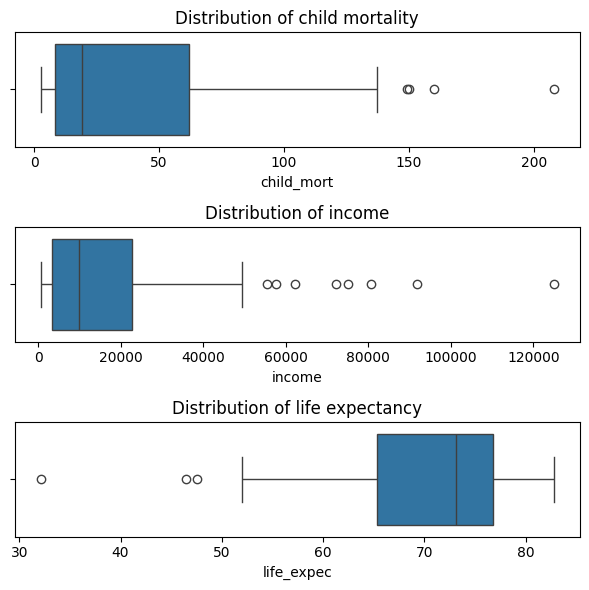

In [ ]:
fig,axs = plt.subplots(3,1,figsize=(6,6))

sns.boxplot(x=df['child_mort'],ax=axs[0])
axs[0].set_title('Distribution of child mortality')

sns.boxplot(x=df['income'],ax=axs[1])
axs[1].set_title('Distribution of income')

sns.boxplot(x=df['life_expec'],ax=axs[2])
axs[2].set_title("Distribution of life expectancy")

plt.tight_layout()
plt.show()

# **Using_HistPlot**

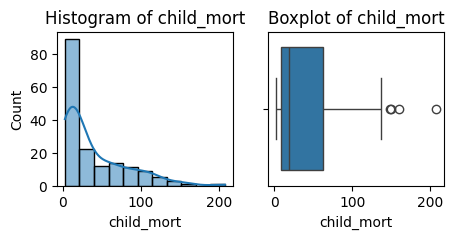

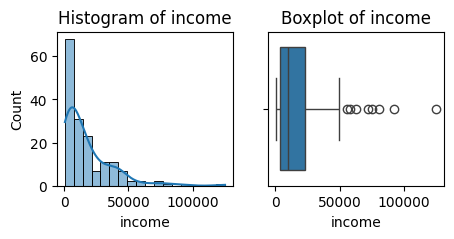

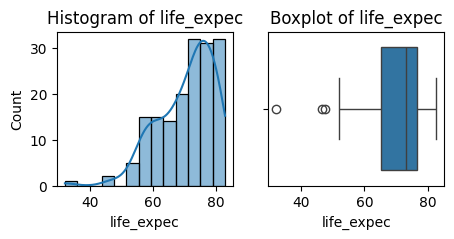

In [ ]:
def plot_distributions(df, features):
    for feature in features:
        plt.figure(figsize=(5, 2))
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram of {feature}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')

        plt.show()

plot_distributions(df, ['child_mort', 'income', 'life_expec'])

# **2.2 Categorical Variables: Using  Pie Chart**

<Figure size 800x800 with 0 Axes>

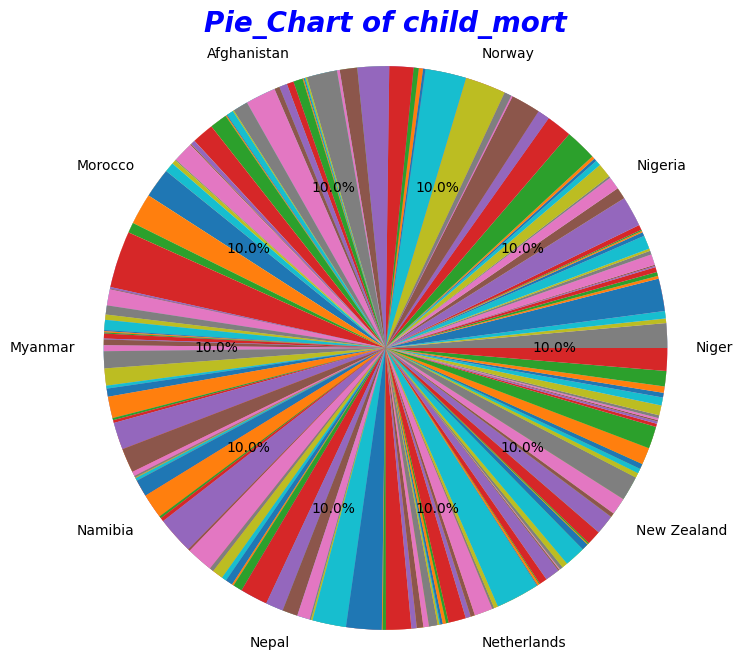

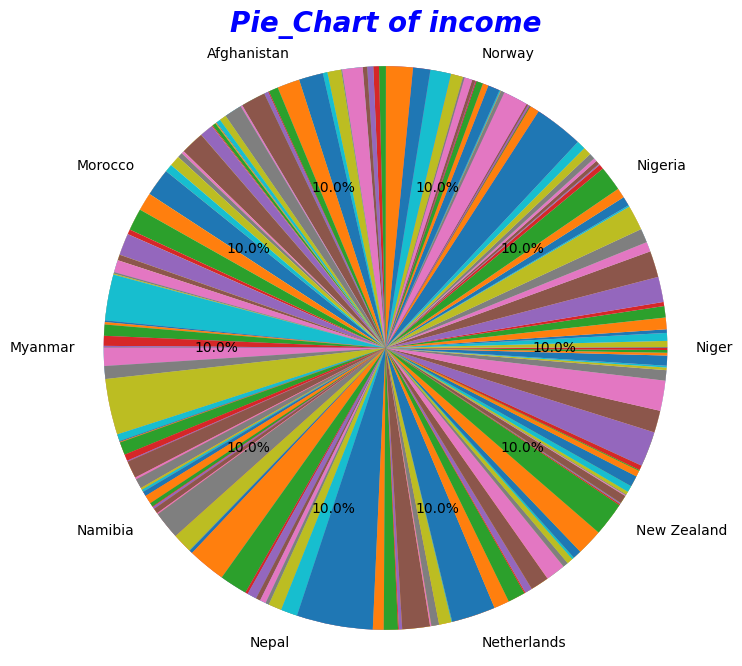

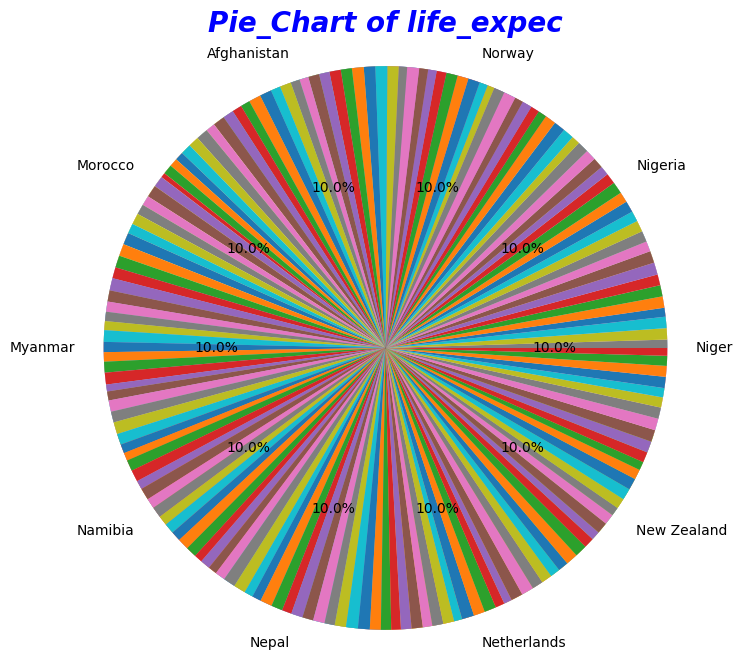

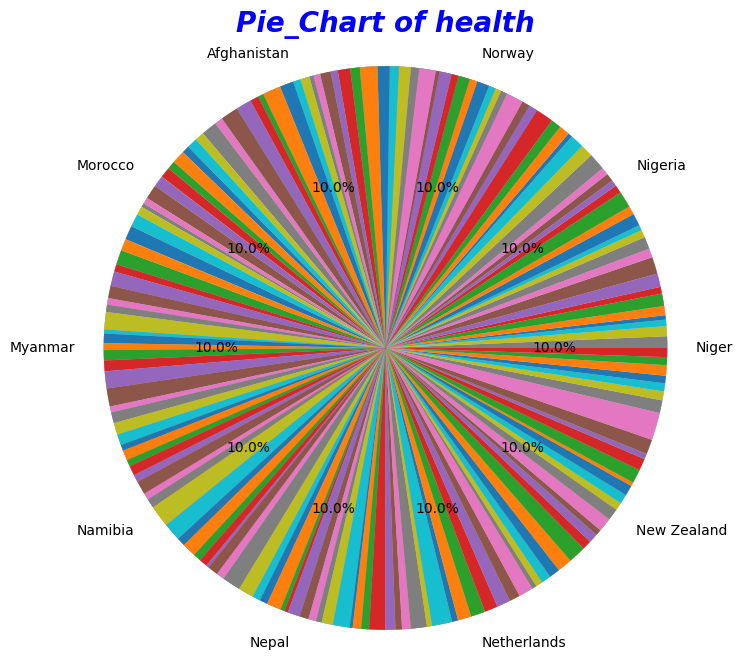

Most represented country: Afghanistan with 1 entries
Least represented country: Afghanistan with 1 entries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset from a CSV file
df = pd.read_csv("Country-data.csv")

# Step 2: Count the occurrences of each country
country_counts = df['country'].value_counts()

# Step 3: Visualize the distribution using a pie chart
top_10_countries = df.head(10)
plt.figure(figsize=(8, 8))


def plot_distributions(df, features):
    for feature in features:
        top_10_countries = country_counts.head(10)
        plt.figure(figsize=(8,8))
        plt.pie(df[feature])
        plt.pie(top_10_countries.values, labels=top_10_countries.index,autopct='%1.1f%%', startangle=90,
          colors=sns.color_palette('Set3', len(top_10_countries)))

        plt.title(f'Pie_Chart of {feature}')

        plt.pie(x=df[feature])
        plt.title(f'Pie_Chart of {feature}',fontsize=20,color='blue',style='italic', fontweight='bold', weight='bold',loc ='center')



        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

plot_distributions(df, ['child_mort', 'income', 'life_expec','health'])

# Analyze the most and least represented countries
most_represented = country_counts.idxmax()
least_represented = country_counts.idxmin()

print(f"Most represented country: {most_represented} with {country_counts.max()} entries")
print(f"Least represented country: {least_represented} with {country_counts.min()} entries")





In [ ]:
# # Pie chart for country distribution (top 10 countries for better clarity)
# top_10_countries = country_counts.head(10)
# plt.figure(figsize=(8, 8))
# plt.pie(top_10_countries.values, labels=top_10_countries.index,autopct='%1.1f%%', startangle=90, shadow= False,
#         colors=sns.color_palette('Set3', len(top_10_countries)))
# plt.title('Top 10 Countries Distribution', fontsize=20)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

# # Identify countries with the highest and lowest GDP per capita and Income
# highest_income_country = df.groupby('country')['child_mort'].mean().idxmax()
# lowest_income_country = df.groupby('country')['child_mort'].mean().idxmin()

# highest_income_country = df.groupby('country')['income'].mean().idxmax()
# lowest_income_country = df.groupby('country')['income'].mean().idxmin()

# highest_gdp_country = df.groupby('country')['life_expec'].mean().idxmax()
# lowest_gdp_country = df.groupby('country')['life_expec'].mean().idxmin()

# # Analyze the most and least represented countries
# most_represented = country_counts.idxmax()
# least_represented = country_counts.idxmin()

# print(f"Most represented country: {most_represented} with {country_counts.max()} entries")
# print(f"Least represented country: {least_represented} with {country_counts.min()} entries")






# **3. Bivariate Analysis:**

# **3.1 Correlations Matrix**

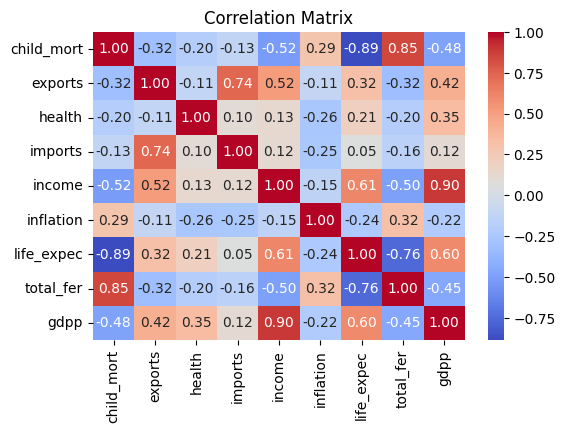

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 600x600 with 0 Axes>

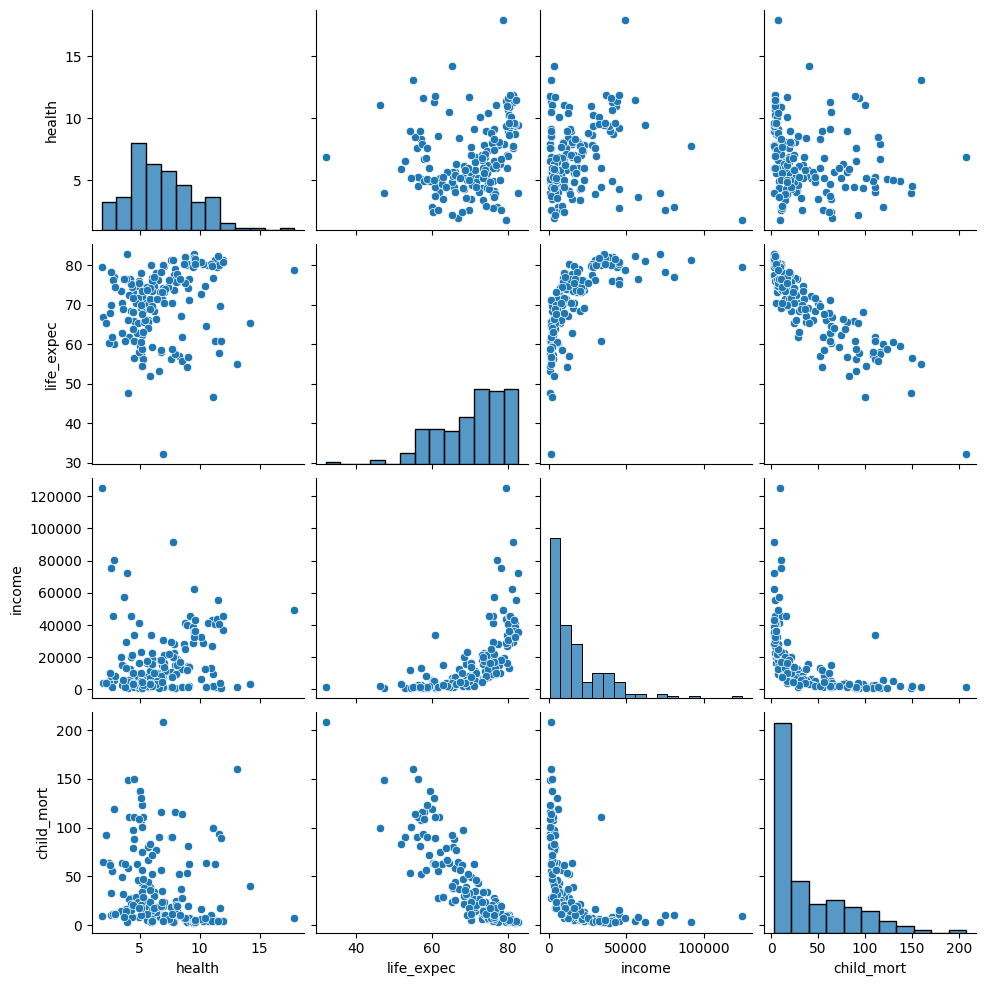

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(df_numeric[['health', 'life_expec', 'income', 'child_mort']])
plt.show()

# **Suggestions for Hypothesis Testing**

---



# **1. Health Spending and Life Expectancy:**

In [ ]:
# Hypothesis: Increased health spending leads to higher life expectancy

high_health_spending = df[df['health'] > df['health'].median()]['life_expec']
low_health_spending = df[df['health'] <= df['health'].median()]['life_expec']

# t_test
t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)
print(f"T-test for Health Spending and Life Expectancy: t_stat={t_stat}, p_value={p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between countries with high and low health spending.")


T-test for Health Spending and Life Expectancy: t_stat=2.934400353862084, p_value=0.0038183094454471724
Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.


# **2. Fertility and Development:**

In [ ]:
# Hypothesis: Countries with higher Total_fertility rates have lower Income per person
correlation_fertility_income, _ = stats.pearsonr(df['total_fer'], df['income'])
print(f"Correlation between Fertility and Income: {correlation_fertility_income}")

high_fertility = df[df['total_fer'] > df['total_fer'].median()]['income']
low_fertility = df[df['total_fer'] <= df['total_fer'].median()]['income']

# t_test
t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)
print(f"T-test for Fertility and Income: t_stat={t_stat}, p_value={p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between countries with high and low fertility rates.")

Correlation between Fertility and Income: -0.5018400532297552
T-test for Fertility and Income: t_stat=-8.084592352034711, p_value=1.2690920222786545e-13
Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.


# **3. Income and Child Mortality:**

In [ ]:
# Hypothesis: Higher income levels are associated with lower child mortality rates
correlation_income_child_mortality, _ = stats.pearsonr(df['income'], df['child_mort'])
print(f"Correlation between income and child Mort: {correlation_income_child_mortality}")

high_income = df[df['income'] > df['income'].median()]['child_mort']
low_income = df[df['income'] <= df['income'].median()]['child_mort']

#T_test
t_stat, p_value = stats.ttest_ind(high_income, low_income)
print(f"T-test for Income and Child Mortality: t_stat={t_stat}, p_value={p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in child mortality rates between countries with high and low income.")


Correlation between income and child Mort: -0.5243150164994348
T-test for Income and Child Mortality: t_stat=-10.186018565020449, p_value=3.2785691051974e-19
Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.


# **4. Inflation and Economic Stability:**

In [ ]:
# Hypothesis: Higher inflation rates are associated with lower GDP per capita
correlation_inflation_gdp, _ = stats.pearsonr(df['inflation'], df['gdpp'])
print(f"Correlation between Inflation and GDP per Capita: {correlation_inflation_gdp}")

high_inflation = df[df['inflation'] > df['inflation'].median()]['gdpp']
low_inflation = df[df['inflation'] <= df['inflation'].median()]['gdpp']

# T_test
t_stat, p_value = stats.ttest_ind(high_inflation, low_inflation)
print(f"T-test for Inflation and GDP per Capita: t_stat={t_stat}, p_value={p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GDP per capita between countries with high and low inflation.")

Correlation between Inflation and GDP per Capita: -0.22163105810153869
T-test for Inflation and GDP per Capita: t_stat=-3.6881176832049887, p_value=0.000306330363917195
Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.


# **Block 3: ML Modeling**

# **1. Data Preprocessing:**

### **1.1 Missing Value Imputation:**

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
numeric_df_imputed

child_mort  exports  health  imports   income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1          16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2          27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3         119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4          10.3     45.5    6.03     58.9  19100.0       1.44        76.8   
..          ...      ...     ...      ...      ...        ...         ...   
162        29.2     46.6    5.25     52.7   2950.0       2.62        63.0   
163        17.1     28.5    4.91     17.6  16500.0      45.90        75.4   
164        23.3     72.0    6.84     80.2   4490.0      12.10        73.1   
165        56.3     30.0    5.18     34.4   4480.0      23.60        67.5   
166        83.1     37.0    5.89     30.9   3280.0      14.00        52.0   

     total_fer     gdpp  
0         5.82    553.0  
1         1.65   4090.0  
2         2.89   4460.0  
3         6.16   3530.0  
4         2.13  12200.0  
..         ...      ...  
162       3.50   2970.0  
163       2.47  13500.0  
164       1.95   1310.0  
165       4.67   1310.0  
166       5.40   1460.0  

[167 rows x 9 columns]

In [ ]:
df_imputed = pd.concat([numeric_df_imputed, non_numeric_df.reset_index(drop=True)], axis=1)
df_imputed = df_imputed[df.columns]
df_imputed.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1              Albania        16.6     28.0    6.55     48.6   9930.0   
2              Algeria        27.3     38.4    4.17     31.4  12900.0   
3               Angola       119.0     62.3    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

In [ ]:
non_numeric_df_dropped = non_numeric_df.dropna()
non_numeric_df_dropped

country
0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
..                   ...
162              Vanuatu
163            Venezuela
164              Vietnam
165                Yemen
166               Zambia

[167 rows x 1 columns]

In [ ]:
####################################
numeric_df_dropped = numeric_df.dropna()
numeric_df_dropped

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

### **1.2 Normalization:**

In [ ]:
# ################################ non_numeric_df_dropped  ##################################

from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
numeric_df_normalized = pd.DataFrame(scaler.fit_transform(numeric_df_imputed), columns=numeric_df.columns)

# Combine the normalized numeric data with the non-numeric data
df_normalized = pd.concat([numeric_df_normalized, non_numeric_df_dropped.reset_index(drop=True)], axis=1)


In [ ]:
df_normalized

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp              country  
0     -1.619092   1.902882 -0.679180          Afghanistan  
1      0.647866  -0.859973 -0.485623              Albania  
2      0.670423  -0.038404 -0.465376              Algeria  
3     -1.179234   2.128151 -0.516268               Angola  
4      0.704258  -0.541946 -0.041817  Antigua and Barbuda  
..          ...        ...       ...                  ...  
162   -0.852161   0.365754 -0.546913              Vanuatu  
163    0.546361  -0.316678  0.029323            Venezuela  
164    0.286958  -0.661206 -0.637754              Vietnam  
165   -0.344633   1.140944 -0.637754                Yemen  
166   -2.092785   1.624609 -0.629546               Zambia  

[167 rows x 10 columns]

### **1.3 Encoding Categorical Variables**

In [ ]:
# Combine the encoded non-numerical data with the normalized numerical data
# df_final = pd.concat([numeric_df_normalized, non_numeric_df_dropped.reset_index(drop = True)], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode non-numerical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
non_numeric_encoded = encoder.fit_transform(non_numeric_df_dropped)
non_numeric_encoded_df = pd.DataFrame(non_numeric_encoded, columns=encoder.get_feature_names_out(non_numeric_df_dropped.columns))

# Combine the encoded non-numerical data with the normalized numerical data
df_final = pd.concat([numeric_df_normalized, non_numeric_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
df_final

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  country_Albania  ...  \
0     -1.619092   1.902882 -0.679180              0.0  ...   
1      0.647866  -0.859973 -0.485623              1.0  ...   
2      0.670423  -0.038404 -0.465376              0.0  ...   
3     -1.179234   2.128151 -0.516268              0.0  ...   
4      0.704258  -0.541946 -0.041817              0.0  ...   
..          ...        ...       ...              ...  ...   
162   -0.852161   0.365754 -0.546913              0.0  ...   
163    0.546361  -0.316678  0.029323              0.0  ...   
164    0.286958  -0.661206 -0.637754              0.0  ...   
165   -0.344633   1.140944 -0.637754              0.0  ...   
166   -2.092785   1.624609 -0.629546              0.0  ...   

     country_United Arab Emirates  country_United Kingdom  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             0.0                     0.0   
..                            ...                     ...   
162                           0.0                     0.0   
163                           0.0                     0.0   
164                           0.0                     0.0   
165                           0.0                     0.0   
166                           0.0                     0.0   

     country_United States  country_Uruguay  country_Uzbekistan  \
0                      0.0              0.0                 0.0   
1                      0.0              0.0                 0.0   
2                      0.0              0.0                 0.0   
3                      0.0              0.0                 0.0   
4                      0.0              0.0                 0.0   
..                     ...              ...                 ...   
162                    0.0              0.0                 0.0   
163                    0.0              0.0                 0.0   
164                    0.0              0.0                 0.0   
165                    0.0              0.0                 0.0   
166                    0.0              0.0                 0.0   

     country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
0                0.0                0.0              0.0            0.0   
1                0.0                0.0              0.0            0.0   
2                0.0                0.0              0.0            0.0   
3                0.0                0.0              0.0            0.0   
4                0.0                0.0              0.0            0.0   
..               ...                ...              ...            ...   
162              1.0                0.0              0.0            0.0   
163              0.0                1.0              0.0            0.0   
164              0.0                0.0              1.0            0.0   
165              0.0                0.0              0.0            1.0   
166              0.0                0.0              0.0

### **1.4  Feature Engineering:**


In [ ]:
# Feature Engineering
df_final['High_Child_Mort'] = (df['child_mort'] > 50).astype(int)  # Example threshold for high child mortality
df_final['Exports_Imports_Ratio'] = df['exports'] / df['imports']

# Ensure all columns are in the final DataFrame
df_final = df_final.reset_index(drop=True)

In [ ]:
df_final.head(10)

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   
5   -0.591177 -0.812628  0.468966 -1.279787  0.080920   1.244725    0.591474   
6   -0.501643 -0.743107 -0.882089 -0.065883 -0.543421  -0.001123    0.309514   
7   -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316    1.290735   
8   -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549    1.121559   
9    0.023128  0.482661 -0.341667 -1.085065 -0.059556   0.571037   -0.164178   

   total_fer      gdpp  country_Albania  ...  country_United States  \
0   1.902882 -0.679180              0.0  ...                    0.0   
1  -0.859973 -0.485623              1.0  ...                    0.0   
2  -0.038404 -0.465376              0.0  ...                    0.0   
3   2.128151 -0.516268              0.0  ...                    0.0   
4  -0.541946 -0.041817              0.0  ...                    0.0   
5  -0.382933 -0.145791              0.0  ...                    0.0   
6  -0.833471 -0.533233              0.0  ...                    0.0   
7  -0.674457  2.130699              0.0  ...                    0.0   
8  -0.999109  1.857082              0.0  ...                    0.0   
9  -0.681083 -0.389857              0.0  ...                    0.0   

   country_Uruguay  country_Uzbekistan  country_Vanuatu  country_Venezuela  \
0              0.0                 0.0              0.0                0.0   
1              0.0                 0.0              0.0                0.0   
2              0.0                 0.0              0.0                0.0   
3              0.0                 0.0              0.0                0.0   
4              0.0                 0.0              0.0                0.0   
5              0.0                 0.0              0.0                0.0   
6              0.0                 0.0              0.0                0.0   
7              0.0                 0.0              0.0                0.0   
8              0.0                 0.0              0.0                0.0   
9              0.0                 0.0              0.0                0.0   

   country_Vietnam  country_Yemen  country_Zambia  High_Child_Mort  \
0              0.0            0.0             0.0                1   
1              0.0            0.0             0.0                0   
2              0.0            0.0             0.0                0   
3              0.0            0.0             0.0                1   
4              0.0            0.0             0.0                0   
5              0.0            0.0             0.0                0   
6              0.0            0.0             0.0                0   
7              0.0            0.0             0.0                0   
8              0.0            0.0             0.0                0   
9              0.0            0.0             0.0                0   

   Exports_Imports_Ratio  
0               0.222717  
1               0.576132  
2               1.222930  
3               1.452214  
4               0.772496  
5               1.181250  
6               0.459161  
7               0.947368  
8               1.073222  
9               2.623188  

[10 rows x 177 columns]

In [ ]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# **2. Model Selection:**

**we'll focus on unsupervised learning algorithms for clustering countries based on their development needs:**

lets build the unsupervised model using clustering technique. There are many algorithms available in clustering. We will pick two common algorithms such as

1. K-means algorithm
2. Hierachical Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

and build the model using both the methods and cluster the countries identify the countries in need

***Kmeans algorithm ***is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group

DBSCAN Silhouette Score: 0.5966140792670774
K-Means Silhouette Score: 0.25703017412049023
Hierarchical Clustering Silhouette Score: 0.23719176497310865


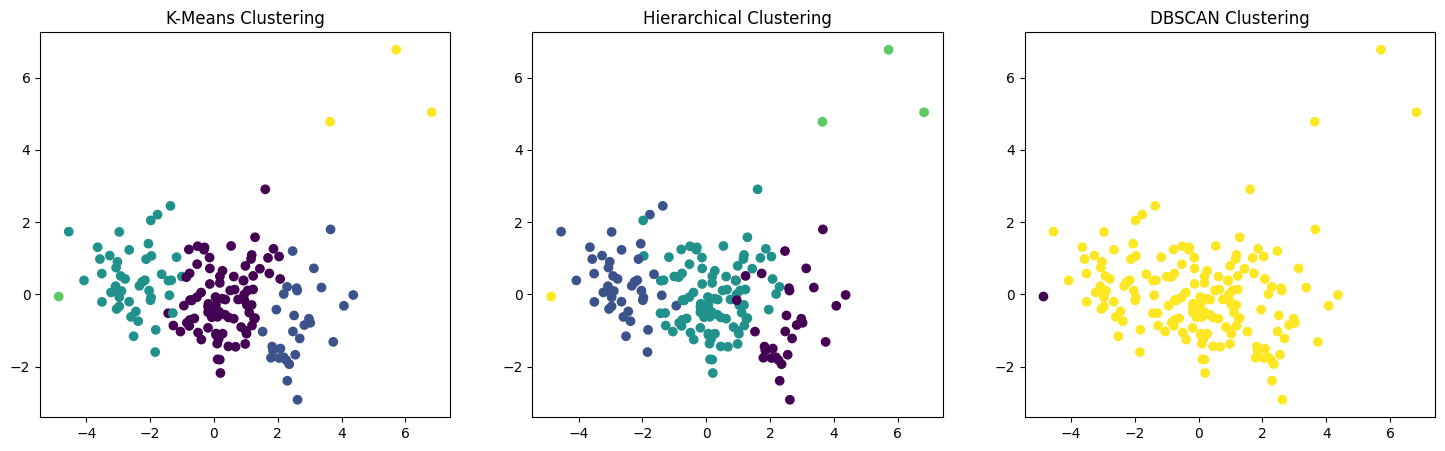

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Example with 5 clusters
kmeans_labels = kmeans.fit_predict(df_final)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(df_final)

# DBSCAN - Try adjusting eps and min_samples
dbscan = DBSCAN(eps=5, min_samples=3)  # Increased eps, decreased min_samples
dbscan_labels = dbscan.fit_predict(df_final)

# Evaluate Clustering Performance (only calculate if there are at least 2 clusters)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_final, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print("DBSCAN resulted in a single cluster. Adjust parameters.")

# Evaluate Clustering Performance
kmeans_silhouette = silhouette_score(df_final, kmeans_labels)
hierarchical_silhouette = silhouette_score(df_final, hierarchical_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

# Visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(18, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Hierarchical Clustering
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

# DBSCAN (only plot if there are at least 2 clusters)
if len(set(dbscan_labels)) > 1:
    plt.subplot(1, 3, 3)
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title('DBSCAN Clustering')

# **3. Model Training and Evaluation:**

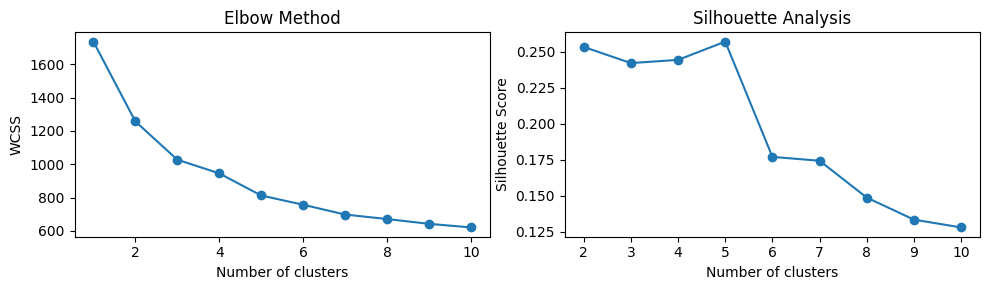

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method for K-Means
ssd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_final)
    ssd.append(kmeans.inertia_)

# Silhouette Analysis for K-Means
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df_final)
    silhouette_scores.append(silhouette_score(df_final, labels))

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# Elbow Method plot
ax[0].plot(range(1, 11), ssd, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('WCSS')

# Silhouette Analysis plot
ax[1].plot(range(2, 11), silhouette_scores, marker='o')
ax[1].set_title('Silhouette Analysis')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# **3. Build model using K-means algorithm for clustering**


### **3.1 Metrics to choose the value of K**

The main challenge in this algorithm is to find the optimal value of **k** or **number of clusters**. There are two common approaches that help to find k:

1. Elbow method
2. Silhouette Analysis


**3.1.1 Elbow Method**

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSD) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

Lets use KMeans() from sklearn to form clusters of 2,3,4 and so on till 11 and calculate SSD and plot the number of clusters and SSD and see where the elbow is formed.

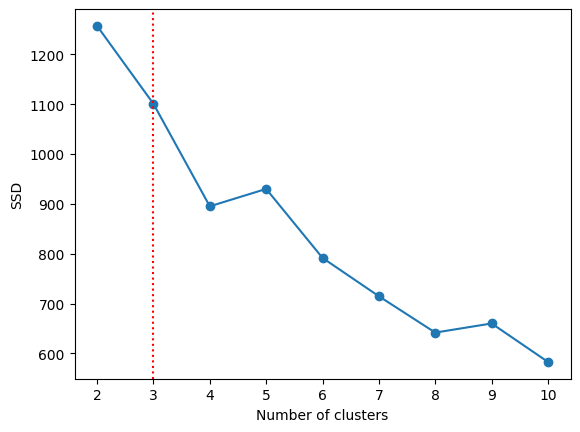

In [ ]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_final)
    ssd.append([k, kmean.inertia_])

temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1],marker='o') # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()








**INFERENCE:**
SSD flattens and forms an elbow at 3 indicating that 3 is optimal value of k.

**3.1.2  Silhouette Analysis**

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Lets use KMeans() from sklearn to form clusters of 2,3,4 and so on till 11 and calculate silhouette_score and plot the number of clusters against silhouette_score

For k_clusters=2, the silhouette score is 0.253364
For k_clusters=3, the silhouette score is 0.242147
For k_clusters=4, the silhouette score is 0.253723
For k_clusters=5, the silhouette score is 0.220006
For k_clusters=6, the silhouette score is 0.185679
For k_clusters=7, the silhouette score is 0.137568
For k_clusters=8, the silhouette score is 0.146003
For k_clusters=9, the silhouette score is 0.175625
For k_clusters=10, the silhouette score is 0.144473


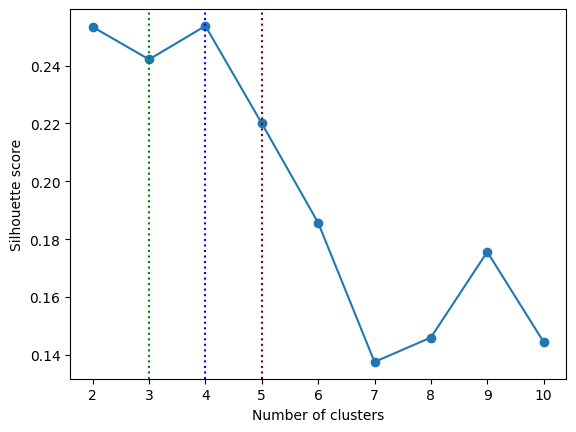

In [ ]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_final) # intialise kmeans
    silhouette_avg = silhouette_score(df_final, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))

temp = pd.DataFrame(silhouette_scores_list)
ax = plt.axes()
ax.plot(temp[0], temp[1],marker='o')
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


**INFERENCES:**


*   The silhouette score is maximum when k is 2 which is 0.39


*   2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

*  3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.

*  Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better cluster profiling

**3.2  Iterating with k=3,4 and 5**

In [ ]:
# Function for all steps of Kmean Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(df_final)
    country_df_kmean = df_final.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis
# Created Models are available globally to access inside cluste

In [ ]:
# Created Models are available globally to access inside cluster profiling functions
k_3_model = K_means_model(3) # K means model with 3 clusters
k_4_model = K_means_model(4) # K means model with 4 clusters
k_5_model = K_means_model(5) # K means model with 5 clusters

Number of countries in each cluster(k=3):
k_means_cluster_label
0    84
2    47
1    36
Name: count, dtype: int64
Number of countries in each cluster(k=4):
k_means_cluster_label
2    69
3    37
0    32
1    29
Name: count, dtype: int64
Number of countries in each cluster(k=5):
k_means_cluster_label
2    84
1    46
4    28
3     6
0     3
Name: count, dtype: int64


**Cluster Analysis:**
We can see that when there are 3 or 4 clusters, there are some distribution of countries. When there are 5 clusters, there is a country which is in a separate cluster. This would make actionable items a bit tedious. We will progress with these 3 models and profile the clusters created by each model based on 3 important parameters i.e GDPP, Income and Child_mortality and see which is a good value of k.

In [ ]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['orange','blue','green','red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_5_model, palette=['red','orange','maroon','green','blue'])

Visualization of GDPP vs Income when k=3,4,5

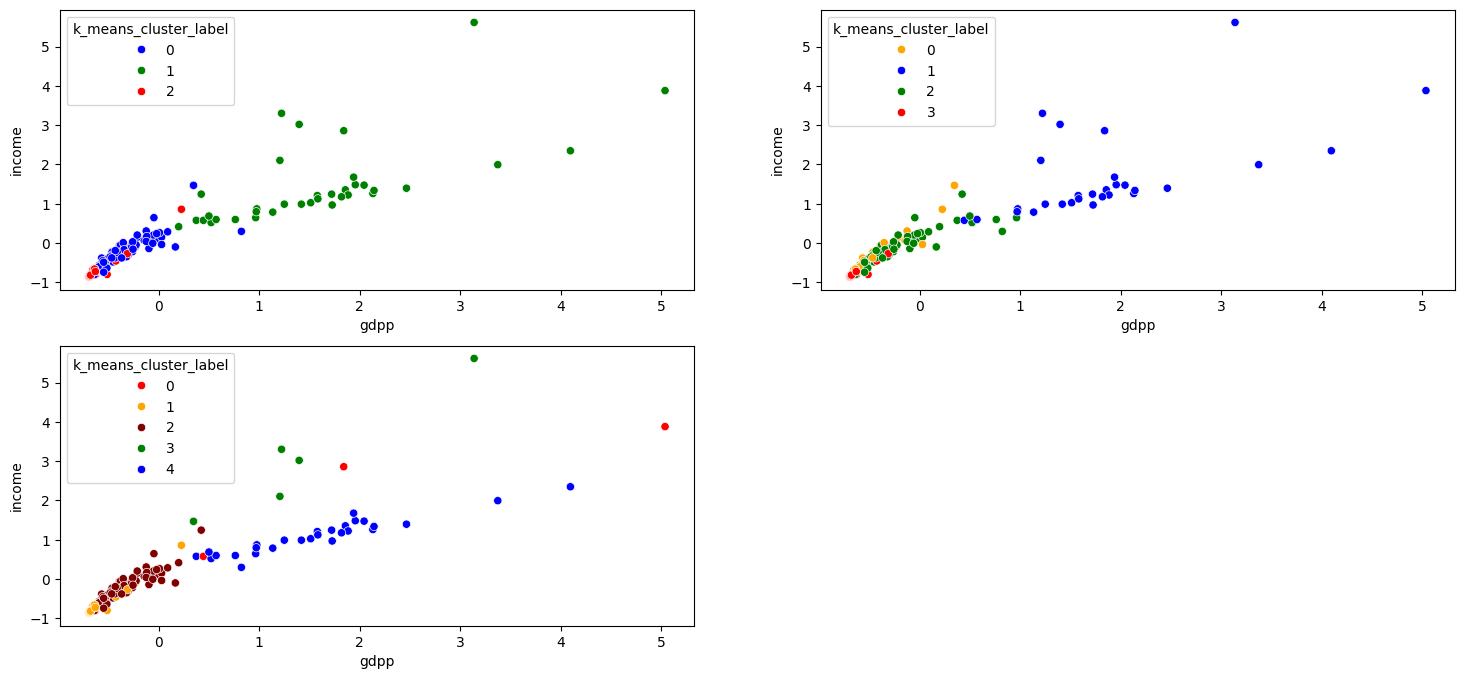

In [ ]:
clusters_scatter_plots('gdpp','income')

**INFERENCES:**

When there are 3 or 4 clusters, there is a distinct separation of the clusters.
When there are 5 clusters, as we have seen previously that one of the clusters has just one country, it cannot be seen evidently here.
Lets visualize the clusters more and see which helps in understanding the clusters and identifying countries in need.



Visualization of GDPP vs Child mortality when k=3,4,5

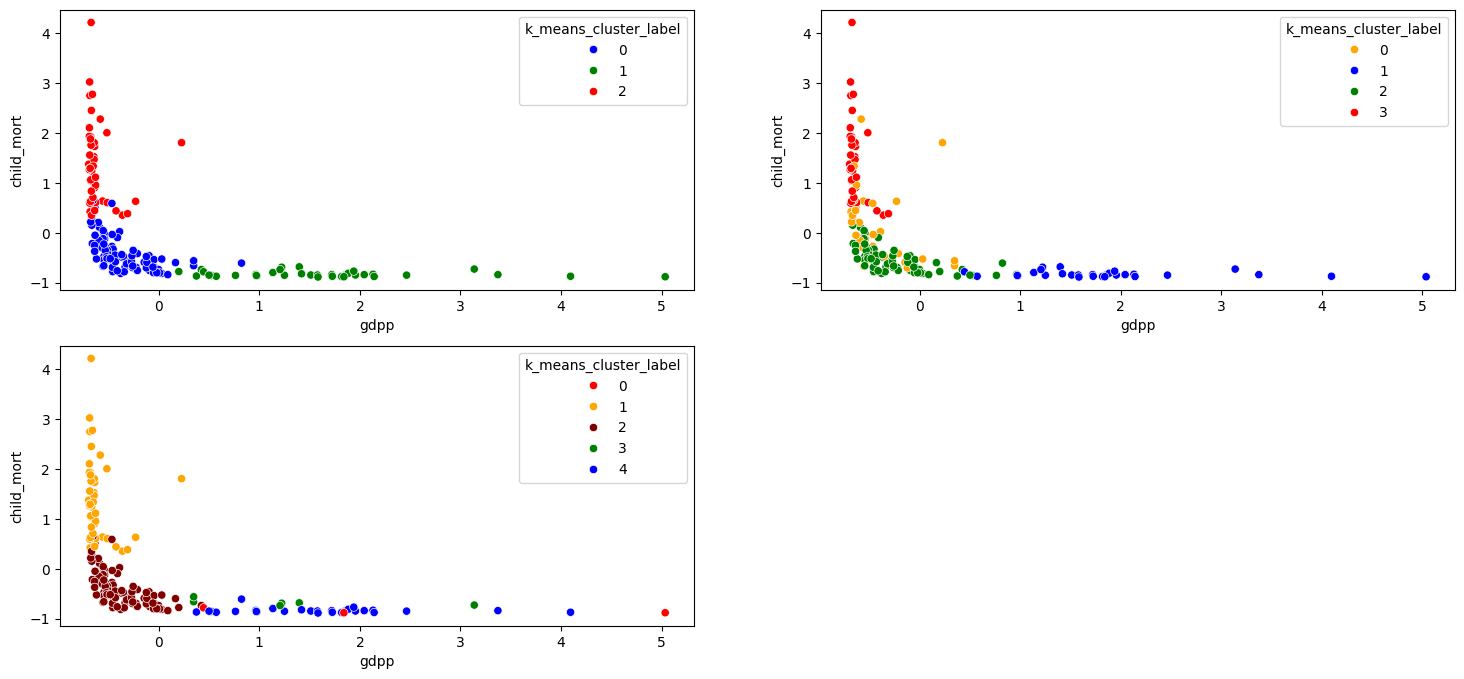

In [ ]:
clusters_scatter_plots('gdpp','child_mort')

**INFERENCES:**

This plot is very helpful to see the clustered groups. For e.g. when k=3, we see that cluster 2 require aid as their gdpp is low and child mortality is pretty high.

As the cluster labels are picked in random and assigned, we can see similar group is represented as 3 when k=4 and k=5.

**Visualization of Child mortality vs Income when k=3,4,5**

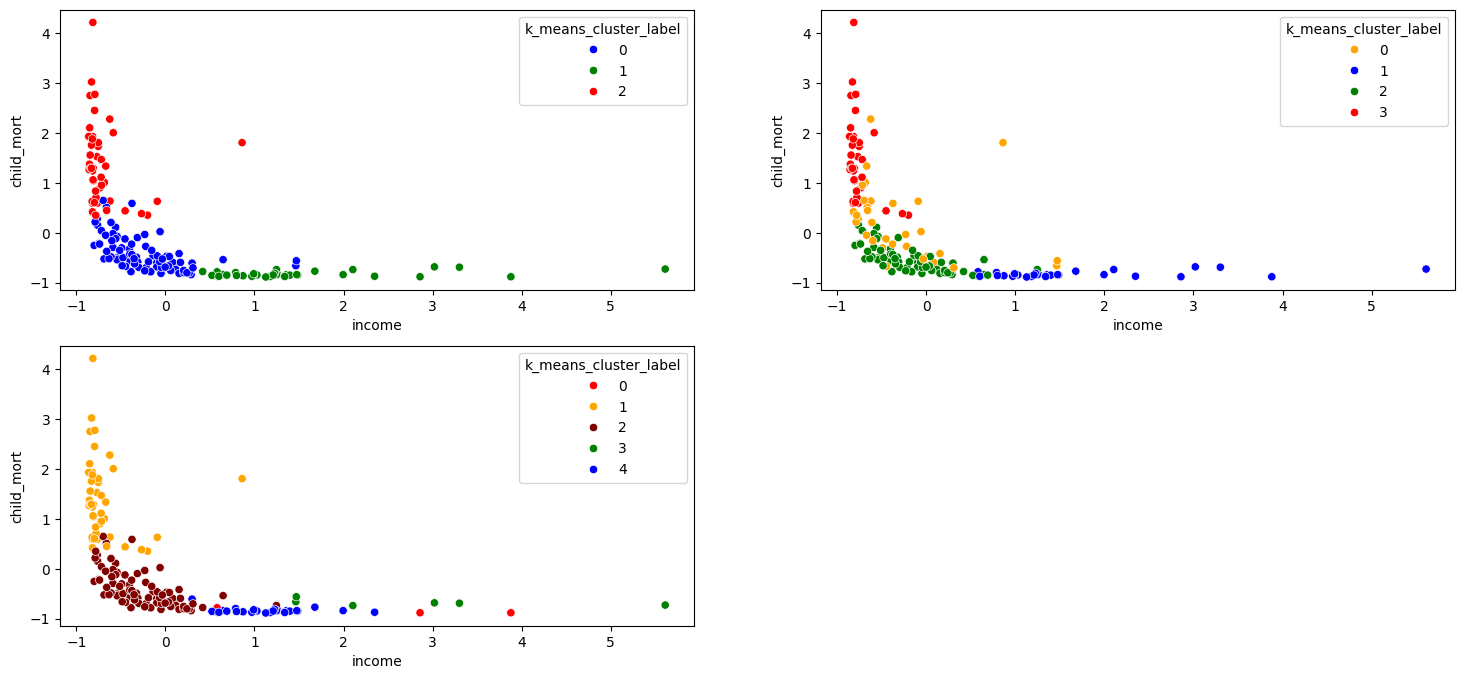

In [ ]:
clusters_scatter_plots('income','child_mort')

**INFERENCES:**
As we saw in previous two scatter plots, we can see that same cluster which had bad child_moratality rate and low gdpp has low income in this plot.

Visualization of univariate distributions when k=3,4,5

Lets also do some boxplots to understand the gdpp, income and child_mortality data distributions within each cluster:

In [ ]:
# Function for Profiling Clusters to plot box plots
def clusters_box_plots(column_name, logy=False):
    #plt.figure(figsize=(18,8))

    if logy:
        i=1
    else:
        i=0

    plt.subplot(2+i,2,1)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
    if logy:
        plt.subplot(3,2,2)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
        plt.yscale('log')

    plt.subplot(2+i,2,2+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange', 'blue','green','red'])
    if logy:
        plt.subplot(3,2,4)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange','blue','green','red'])
        plt.yscale('log')

    plt.subplot(2+i,2,3+i+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
    if logy:
        plt.subplot(3,2,6)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
        plt.yscale('log')

**Visualization of GDPP distribution when k=3,4,5**

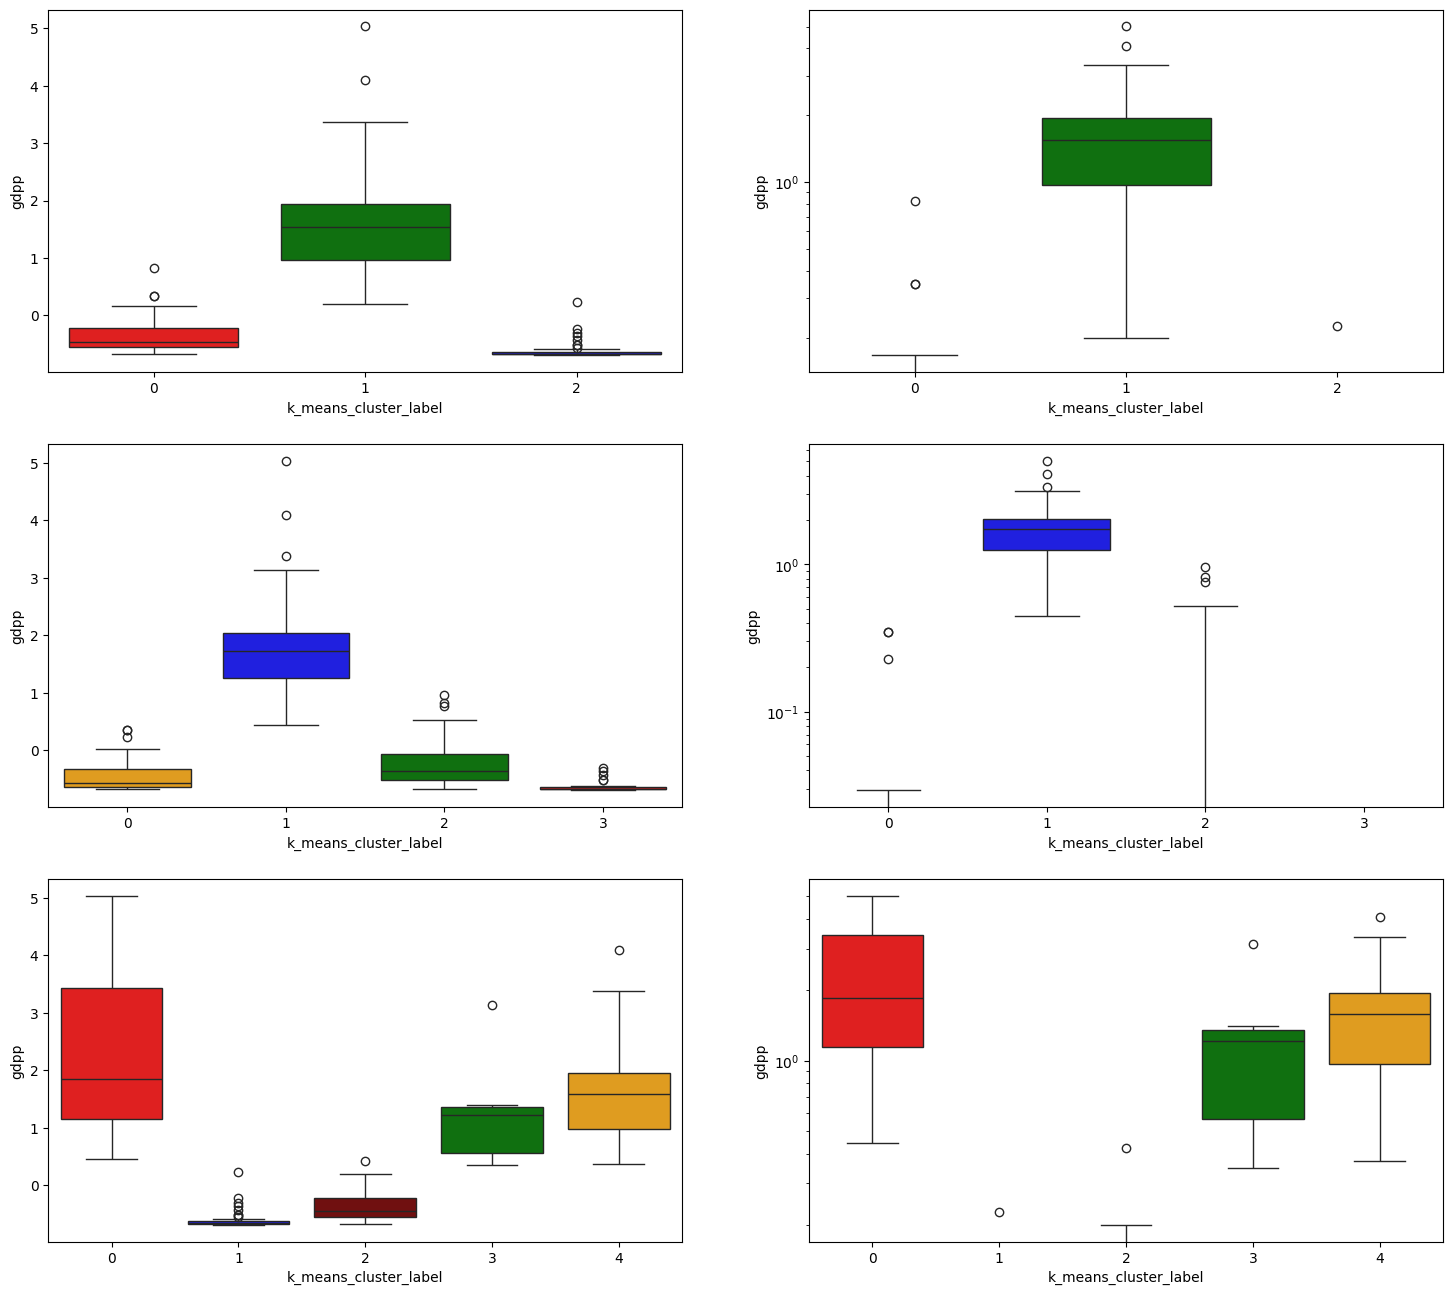

In [ ]:
plt.figure(figsize = (18,16))
clusters_box_plots('gdpp',True) # log scaled
plt.show()

**INFERENCES:**
Income follows the same pattern as that of GDPP.
The clusters are seggregated well when k=3 and slightly overlaps when k=4 and k=5
k=3 seems to be a good indicator of k as the cohesion within the cluster is good and clusters are well separated.

Visualization of Child mortality distribution when k=3,4,5

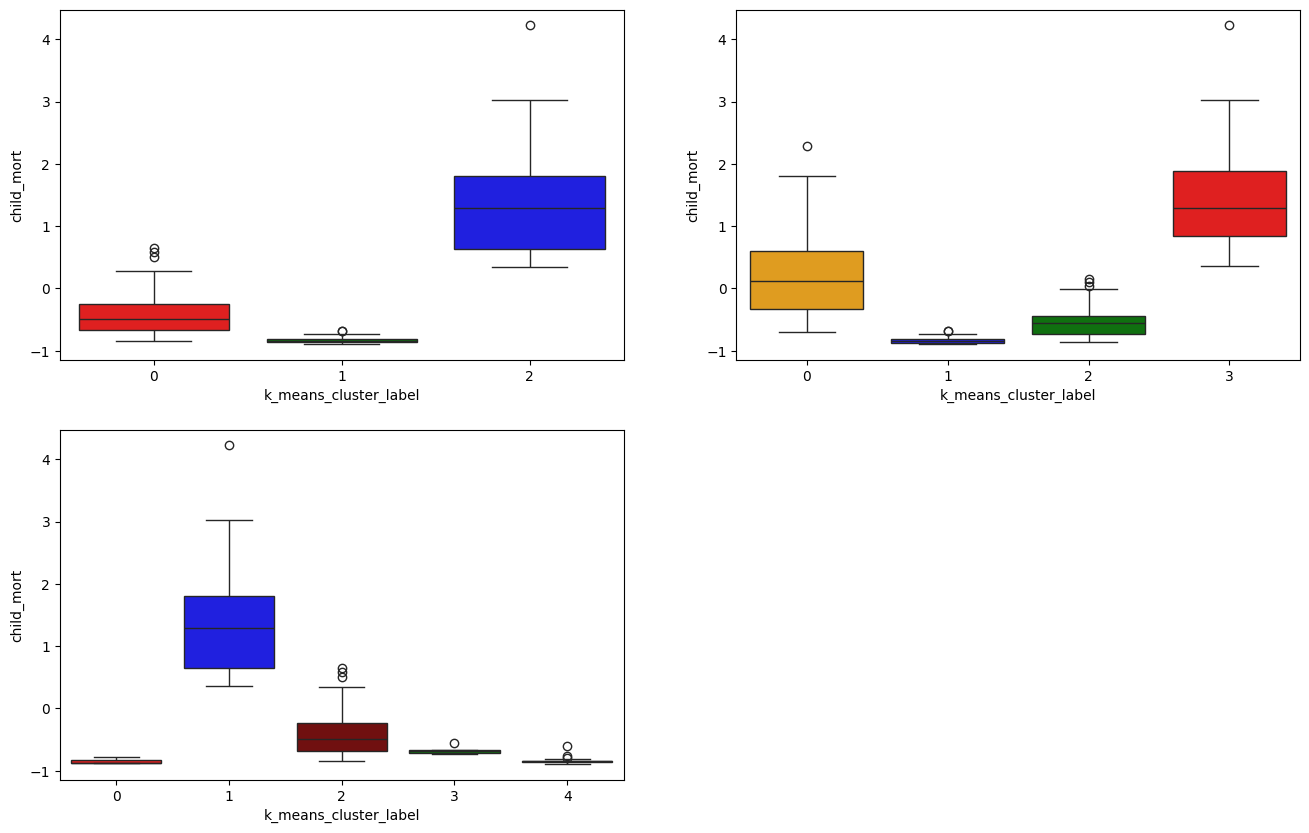

In [ ]:
plt.figure(figsize = (16,10))
clusters_box_plots('child_mort')
plt.show()

**INFERENCES:**

Child mortality follows the opposite pattern of GDPP and income.
Clusters which were high on GDPP and income have less child mortality, indicating that these countries have ample amount of money to take care of child mortaliy and health issues.
We can see that k=3 gives good clusters as the cohesion within the cluster is good and clusters are well separated.


Visualization of Mean of GDPP, income and Child mortality when k=3,4,5

<Figure size 1800x800 with 0 Axes>

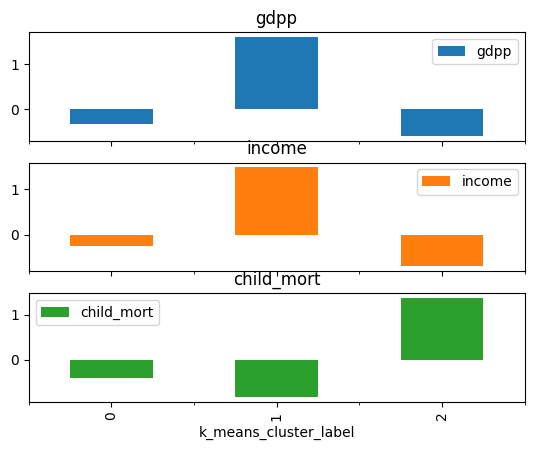

In [ ]:
plt.figure(figsize=(18,8))
grouped_df_k3 = k_3_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k3.plot.bar(subplots=True)
plt.show()

**INFERENCES:**
When K=3, the clusters can be profiled as

0 : Medium GDPP, medium Income and mild child mortality rate.

1 : High GDPP, High income and very low child mortality rate.

2 : Low GDPP, Low income and very high mortality rate.

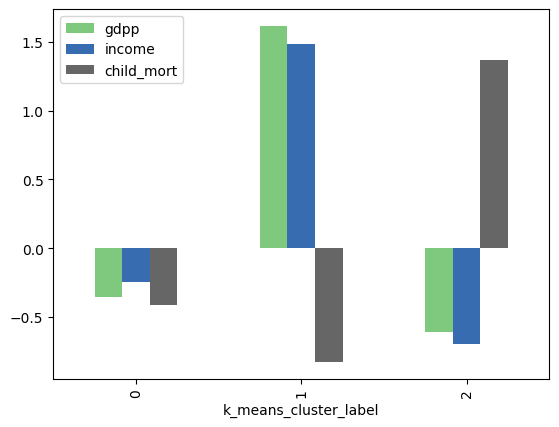

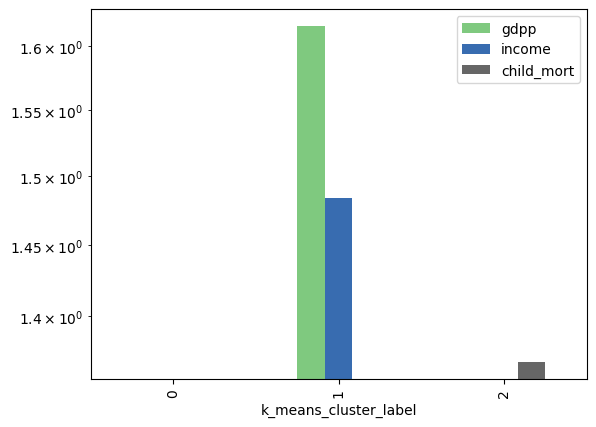

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together

grouped_df_k3.plot(kind='bar', colormap='Accent')
grouped_df_k3.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

**INFERENCES:**
This gives a very good inference about each cluster.

0 : Medium GDPP, medium Income and mild child mortality rate.

1 : High GDPP, High income and very low child mortality rate.

2 : Low GDPP, Low income and very high mortality rate and has to be focussed.


<Figure size 1800x800 with 0 Axes>

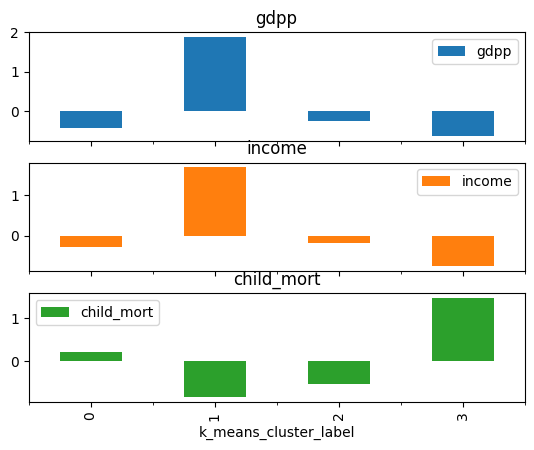

In [ ]:
plt.figure(figsize=(18,8))
grouped_df_k4 = k_4_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k4.plot.bar(subplots=True)
plt.show()

**INFERENCES:**

When K=4, the clusters 1 and 2 are a bit similar and it seems to be in same cluster when k=3. Lets profile the clusters as

0 : Medium GDPP, medium Income and mild child mortality rate.

1 : High GDPP, High income and very low child mortality rate.

2 : Very high GDPP, Very high income and very low child mortality rate.
3 : Low GDPP, Low income and very high mortality rate
Since we are concerned about the countries not doing well, this granular seggregation of countries doing well is not of our primary concern.

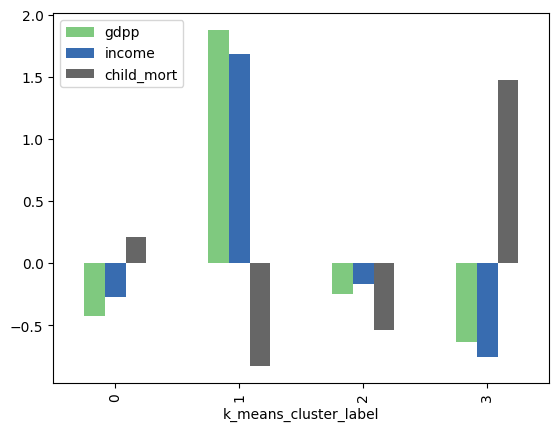

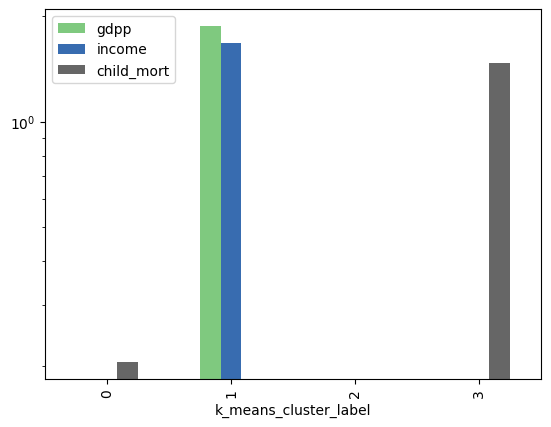

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k4.plot(kind='bar', colormap='Accent')
grouped_df_k4.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

**INFERENCES:**

Not much of difference between clusters 2 and 1 and these can be represented in a single cluster leading to k=3 being a good number

<Figure size 1800x800 with 0 Axes>

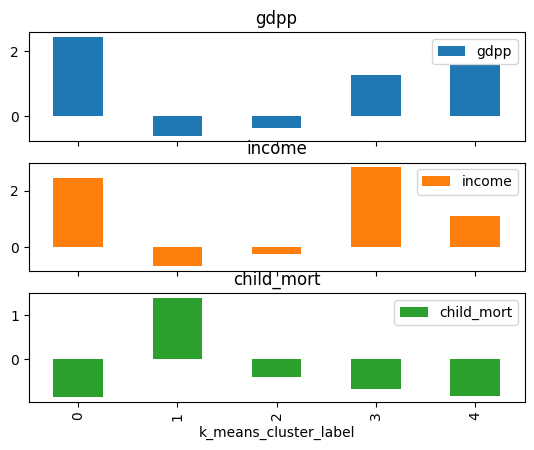

In [ ]:
plt.figure(figsize=(18,8))
grouped_df_k5 = k_5_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k5.plot.bar(subplots=True)
plt.show()

**INFERENCES:**

* The clusters 1 and 3 are a bit similar and it seems to be in same cluster when k=3


* Cluster 4 is not effective as its just one country and we cannot compare it with other clusters.So k=5 is not effective for identifying the countries that are in need of aid.

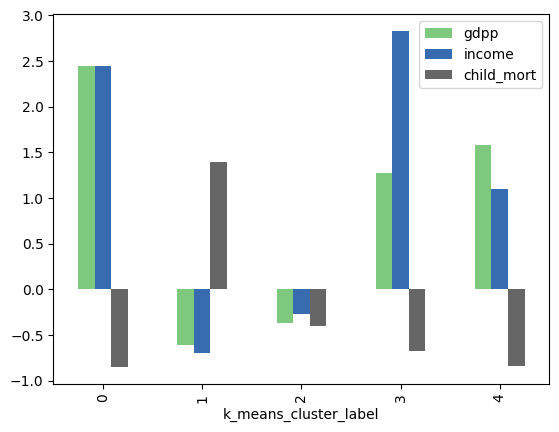

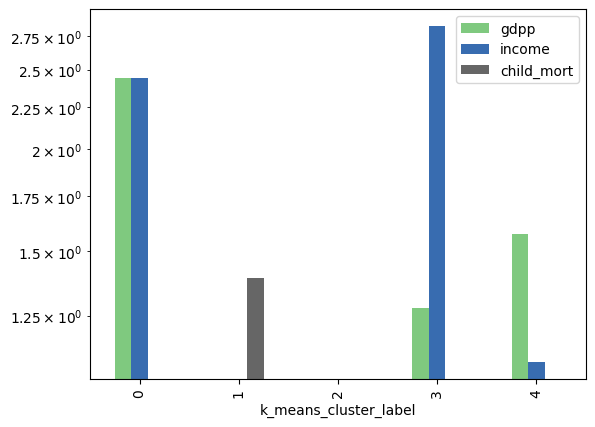

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k5.plot(kind='bar', colormap='Accent')
grouped_df_k5.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

In [ ]:

k_5_model[k_5_model['k_means_cluster_label']==4]



child_mort   exports    health   imports    income  inflation  \
7     -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316   
8     -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549   
10    -0.608587 -0.223528  0.392285 -0.132171  0.299440  -0.775674   
15    -0.839884  1.291301  1.418356  1.152164  1.246357  -0.559999   
29    -0.812526 -0.439409  1.637446 -0.658334  1.225546  -0.466062   
42    -0.862268  0.332641 -0.308803  0.439565  0.871752  -0.547664   
43    -0.867242  0.910764  0.388633  0.663288  0.580393  -0.874070   
44    -0.849832  0.343618  1.673961 -0.136314  1.397240  -0.432852   
53    -0.877190 -0.088145  0.779344 -0.393181  1.178720  -0.705079   
54    -0.847345 -0.523567  1.856536 -0.778482  1.027838  -0.638754   
58    -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461   
60    -0.854806 -0.695540  1.272296 -0.670763  0.601205  -0.674526   
68    -0.887138  0.449729  0.943661 -0.148743  1.126692  -0.219360   
73    -0.847345  2.264597  0.866980  1.641040  1.485688  -1.043915   
74    -0.837397 -0.223528  0.297346 -0.579617  0.648030  -0.570436   
75    -0.852319 -0.582111  0.991131 -0.815769  0.991418  -0.708115   
77    -0.872216 -0.955329  0.976525 -1.379219  0.970606  -0.918666   
110   -0.839884  1.130305  1.856536  0.692289  1.475282  -0.657921   
111   -0.797604 -0.395501  1.199266 -0.782625  0.788507  -0.384461   
114   -0.872216 -0.051555  0.972873 -0.761910  2.349360  -0.173815   
122   -0.854806 -0.410137  1.527901 -0.393181  0.523162  -0.677372   
135   -0.872216  0.848561  0.947313  0.663288  0.601205  -0.832036   
138   -0.849832  0.303369  0.041741 -0.028596  0.689653  -0.438545   
139   -0.857293 -0.571134  0.994782 -0.832341  0.798913  -0.723202   
144   -0.877190  0.186281  1.027646 -0.256462  1.340008  -0.644352   
145   -0.839884  0.837584  1.710476  0.265559  1.995566  -0.708305   
158   -0.822475 -0.472340  1.031297 -0.666620  0.991418  -0.589413   
159   -0.770246 -1.050464  4.047436 -1.288073  1.678193  -0.622623   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
7      1.290735  -0.674457  2.130699              0.0  ...              0.0   
8      1.121559  -0.999109  1.857082              0.0  ...              0.0   
10     0.365906  -0.720836  0.822811              0.0  ...              0.0   
15     1.065167  -0.720836  1.720274              0.0  ...              0.0   
29     1.211786  -0.873224  1.884444              0.0  ...              0.0   
42     1.053889  -1.012361  0.976037              0.0  ...              0.0   
43     0.783207  -0.952731  0.374080              0.0  ...              0.0   
44     1.008775  -0.714211  2.464511              0.0  ...              0.0   
53     1.065167  -0.714211  1.818776              0.0  ...              0.0   
54     1.223065  -0.608202  1.512325              0.0  ...              0.0   
58     1.076446  -1.032237  1.577993              0.0  ...              0.0   
60     1.110281  -0.972607  0.762616              0.0  ...              0.0   
68     1.290735  -0.495567  1.583465              0.0  ...              0.0   
73     1.110281  -0.594951  1.955584              0.0  ...              0.0   
74     1.223065   0.054353  0.965092              0.0  ...              0.0   
75     1.256900  -0.985858  1.249653              0.0  ...              0.0   
77     1.380962  -1.032237  1.725746              0.0  ...              0.0   
110    1.144116  -0.767215  2.043141              0.0  ...              0.0   
111    1.166673  -0.515444  1.134734              0.0  ...              0.0   
114    1.177951  -0.661206  4.095266              0.0  ...              0.0   
122    1.042610  -1.032237  0.521833              0.0  ...              0.0   
135    1.008775  -0.912977  0.571084              0.0  ...              0.0   
138    1.076446  -1.138246  0.499944              0.0  ...              0.0   
139    1.279457  -1.045488  0.970564              0.0  ...              0.0   

**INFERENCES:**

When K=5, we saw that there was only one country in cluster 4.


*   Clusters 1 and 3 are similar
*   Cluster 0 and 4 are also similar.

Our concern is on clusters 2 and 3. But if they are spread across clusters, its difficult to find which country needs the aid at most than the other. So lets go with k=3 as optimal number of clusters.

### 3.3 Final Model: K-means clustering with K =3

Now that we have solved the biggest challenge in K-means algorithm i.e. Find the optimal value of k, we can build our final model using k=3. Lets run K-means algorithm on the scaled data set as the clustering takes Euclidean distance as a measure

In [ ]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df_final)

KMeans(n_clusters=3, random_state=50)

**Creating Cluster labels using K-means**

Since scaled data will be a bit confusing while explaining to business people, we will copy the actual data into a new dataframe to explain the cluster labels. We will use this country_df_kmean_3 for cluster profiling. Lets create a column called k_means_cluster_label and concatenate to the country_df_kmean_3 to assign the countries with the cluster labels.

In [ ]:
country_df_kmean = df_final.copy() # copy df into new df, as the same df will be used for hierarchical clustering too.
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

k_means_cluster_label
0                      2
1                      1
2                      1
3                      2
4                      1

In [ ]:
country_df_kmean = pd.concat([country_df_kmean, label], axis =1)
country_df_kmean.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  country_Albania  ...  country_Uruguay  \
0   1.902882 -0.679180              0.0  ...              0.0   
1  -0.859973 -0.485623              1.0  ...              0.0   
2  -0.038404 -0.465376              0.0  ...              0.0   
3   2.128151 -0.516268              0.0  ...              0.0   
4  -0.541946 -0.041817              0.0  ...              0.0   

   country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
0                 0.0              0.0                0.0              0.0   
1                 0.0              0.0                0.0              0.0   
2                 0.0              0.0                0.0              0.0   
3                 0.0              0.0                0.0              0.0   
4                 0.0              0.0                0.0              0.0   

   country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
0            0.0             0.0                1               0.222717   
1            0.0             0.0                0               0.576132   
2            0.0             0.0                0               1.222930   
3            0.0             0.0                1               1.452214   
4            0.0             0.0                0               0.772496   

   k_means_cluster_label  
0                      2  
1                      1  
2                      1  
3                      2  
4                      1  

[5 rows x 178 columns]

**3.4 INITIAL CLUSTER PROFILING**


*   value_counts shows how many countries are clustered under each cluster label.

*   Lets analyse these 3 clusters and see if we can profile these clusters by comparing their gdpp, child_mort, income
*  Lets visualize these clusters using scatter plots, barplots and boxplots


*   We also need to analyse the clusters and see if k=3 helps us to identify the countries which are in dire need of aid

In [ ]:
country_df_kmean.k_means_cluster_label.value_counts()

k_means_cluster_label
1    85
2    49
0    33
Name: count, dtype: int64

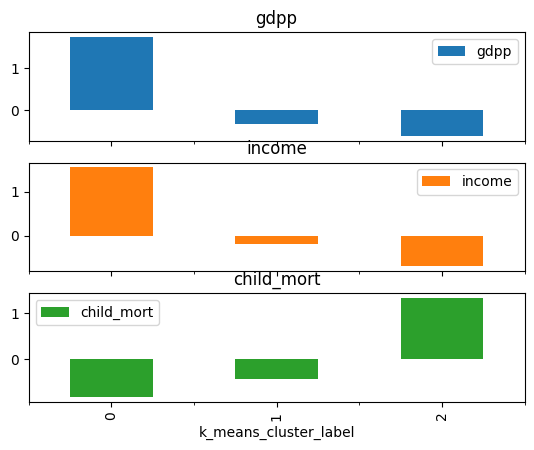

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT in separate plots

grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<Axes: xlabel='k_means_cluster_label'>

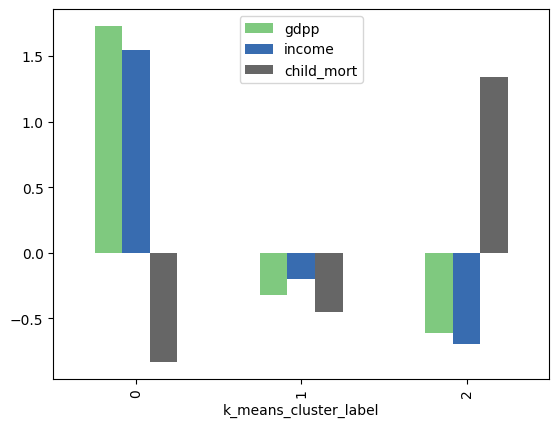

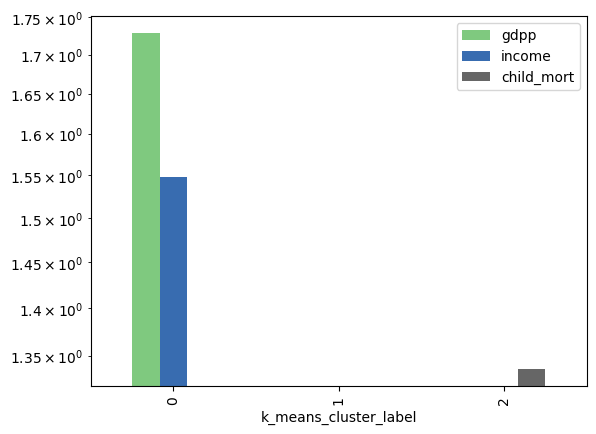

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

**INFERENCES:**

From the above three plots, We can see that the clusters are grouped as

0 : Medium GDPP, medium Income and mild child mortality rate.

1 : High GDPP, High income and very low child mortality rate.

2 : Low GDPP, Low income and very high mortality rate.

**3.5 Countries Segmentation**

We can rename the labels for better business understanding as cluster label 0, 1 and 2 does not make sense to interpret. Then we will perform the cluster profiling with new labels.

Lets rename the cluster labesl as


0 : Developing Countries

1 : Developed Countries

2 : Under-developed Countries

This would help the NGO to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries and focus on Cluster **2: Under-developed Countries**

In [ ]:
# Medium income, Medium GDP and Slightly high Child_mort
# Filter the data for that clsuter

country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 0,'k_means_cluster_label'] ='Developing Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries']

child_mort   exports    health   imports    income  inflation  \
7     -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316   
8     -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549   
15    -0.839884  1.291301  1.418356  1.152164  1.246357  -0.559999   
23    -0.690660  0.961991 -1.451722 -0.782625  3.301480   0.846206   
29    -0.812526 -0.439409  1.637446 -0.658334  1.225546  -0.466062   
42    -0.862268  0.332641 -0.308803  0.439565  0.871752  -0.547664   
43    -0.867242  0.910764  0.388633  0.663288  0.580393  -0.874070   
44    -0.849832  0.343618  1.673961 -0.136314  1.397240  -0.432852   
53    -0.877190 -0.088145  0.779344 -0.393181  1.178720  -0.705079   
54    -0.847345 -0.523567  1.856536 -0.778482  1.027838  -0.638754   
58    -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461   
60    -0.854806 -0.695540  1.272296 -0.670763  0.601205  -0.674526   
68    -0.887138  0.449729  0.943661 -0.148743  1.126692  -0.219360   
73    -0.847345  2.264597  0.866980  1.641040  1.485688  -1.043915   
74    -0.837397 -0.223528  0.297346 -0.579617  0.648030  -0.570436   
75    -0.852319 -0.582111  0.991131 -0.815769  0.991418  -0.708115   
77    -0.872216 -0.955329  0.976525 -1.379219  0.970606  -0.918666   
82    -0.683199  0.936378 -1.528404 -0.683193  3.020526   0.324335   
91    -0.882164  4.899083  0.348467  3.940415  3.878996  -0.394898   
98    -0.782681  4.094101  0.669799  4.437577  0.580393  -0.374972   
110   -0.839884  1.130305  1.856536  0.692289  1.475282  -0.657921   
111   -0.797604 -0.395501  1.199266 -0.782625  0.788507  -0.384461   
114   -0.872216 -0.051555  0.972873 -0.761910  2.349360  -0.173815   
122   -0.854806 -0.410137  1.527901 -0.393181  0.523162  -0.677372   
123   -0.727966  0.775381 -1.827827 -0.956632  5.611542  -0.076082   
133   -0.882164  5.813835 -1.042755  5.266181  2.859238  -0.742749   
135   -0.872216  0.848561  0.947313  0.663288  0.601205  -0.832036   
139   -0.857293 -0.571134  0.994782 -0.832341  0.798913  -0.723202   
144   -0.877190  0.186281  1.027646 -0.256462  1.340008  -0.644352   
145   -0.839884  0.837584  1.710476  0.265559  1.995566  -0.708305   
157   -0.737914  1.338868 -1.152299  0.692289  2.104826   0.447686   
158   -0.822475 -0.472340  1.031297 -0.666620  0.991418  -0.589413   
159   -0.770246 -1.050464  4.047436 -1.288073  1.678193  -0.622623   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
7      1.290735  -0.674457  2.130699              0.0  ...              0.0   
8      1.121559  -0.999109  1.857082              0.0  ...              0.0   
15     1.065167  -0.720836  1.720274              0.0  ...              0.0   
23     0.738094  -0.734087  1.222291              0.0  ...              0.0   
29     1.211786  -0.873224  1.884444              0.0  ...              0.0   
42     1.053889  -1.012361  0.976037              0.0  ...              0.0   
43     0.783207  -0.952731  0.374080              0.0  ...              0.0   
44     1.008775  -0.714211  2.464511              0.0  ...              0.0   
53     1.065167  -0.714211  1.818776              0.0  ...              0.0   
54     1.223065  -0.608202  1.512325              0.0  ...              0.0   
58     1.076446  -1.032237  1.577993              0.0  ...              0.0   
60     1.110281  -0.972607  0.762616              0.0  ...              0.0   
68     1.290735  -0.495567  1.583465              0.0  ...              0.0   
73     1.110281  -0.594951  1.955584              0.0  ...              0.0   
74     1.223065   0.054353  0.965092              0.0  ...              0.0   
75     1.256900  -0.985858  1.249653              0.0  ...              0.0   
77     1.380962  -1.032237  1.725746              0.0  ...              0.0   
82     0.862156  -0.488942  1.397406              0.0  ...              0.0   
91     1.211786  -0.873224  5.036507              0.0  ...              0.0   
98     1.099002  -1.052114  0.445220        

In [ ]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries'].describe()

child_mort    exports     health    imports     income  inflation  \
count   33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean    -0.830991   0.624031   0.790851   0.164996   1.547807  -0.493751   
std      0.053714   1.597733   1.180120   1.584039   1.107352   0.394777   
min     -0.887138  -1.050464  -1.827827  -1.379219   0.523162  -1.043915   
25%     -0.867242  -0.439409   0.388633  -0.778482   0.871752  -0.705079   
50%     -0.847345   0.332641   0.976525  -0.393181   1.225546  -0.628316   
75%     -0.822475   0.936378   1.527901   0.663288   1.678193  -0.394898   
max     -0.683199   5.813835   4.047436   5.266181   5.611542   0.846206   

       life_expec  total_fer       gdpp  country_Albania  ...  \
count   33.000000  33.000000  33.000000             33.0  ...   
mean     1.109597  -0.783076   1.728897              0.0  ...   
std      0.172202   0.243489   1.010958              0.0  ...   
min      0.670423  -1.191250   0.374080              0.0  ...   
25%      1.042610  -0.985858   1.134734              0.0  ...   
50%      1.110281  -0.734087   1.583465              0.0  ...   
75%      1.223065  -0.661206   1.955584              0.0  ...   
max      1.380962   0.054353   5.036507              0.0  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count              33.000000             33.0                33.0   
mean                0.030303              0.0                 0.0   
std                 0.174078              0.0                 0.0   
min                 0.000000              0.0                 0.0   
25%                 0.000000              0.0                 0.0   
50%                 0.000000              0.0                 0.0   
75%                 0.000000              0.0                 0.0   
max                 1.000000              0.0                 0.0   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count             33.0               33.0             33.0           33.0   
mean               0.0                0.0              0.0            0.0   
std                0.0                0.0              0.0            0.0   
min                0.0                0.0              0.0            0.0   
25%                0.0                0.0              0.0            0.0   
50%                0.0                0.0              0.0            0.0   
75%                0.0                0.0              0.0            0.0   
max                0.0                0.0              0.0            0.0   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count            33.0             33.0              33.000000  
mean              0.0              0.0               1.171546  
std               0.0              0.0               0.424966  
min               0.0              0.0               0.719870  
25%               0.0              0.0               0.951493  
50%               0.0              0.0               1.073222  
75%               0.0              0.0               1.190751  
max               0.0              0.0               2.617647  

[8 rows x 177 columns]

Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.

In [ ]:
# Developed Countries: High income, High GDP and Low Child_mort
# Filter the data for that clsuter
country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 1,'k_means_cluster_label'] ='Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries']

child_mort   exports    health   imports    income  inflation  \
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
5     -0.591177 -0.812628  0.468966 -1.279787  0.080920   1.244725   
6     -0.501643 -0.743107 -0.882089 -0.065883 -0.543421  -0.001123   
..          ...       ...       ...       ...       ...        ...   
160   -0.688173 -0.541862  0.560254 -0.890343 -0.002325  -0.272496   
161   -0.048997 -0.344275 -0.367227 -0.761910 -0.671411   0.827229   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
1      0.647866  -0.859973 -0.485623              1.0  ...              0.0   
2      0.670423  -0.038404 -0.465376              0.0  ...              0.0   
4      0.704258  -0.541946 -0.041817              0.0  ...              0.0   
5      0.591474  -0.382933 -0.145791              0.0  ...              0.0   
6      0.309514  -0.833471 -0.533233              0.0  ...              0.0   
..          ...        ...       ...              ...  ...              ...   
160    0.659145  -0.575074 -0.058234              0.0  ...              1.0   
161   -0.198014  -0.402810 -0.633923              0.0  ...              0.0   
162   -0.852161   0.365754 -0.546913              0.0  ...              0.0   
163    0.546361  -0.316678  0.029323              0.0  ...              0.0   
164    0.286958  -0.661206 -0.637754              0.0  ...              0.0   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
1                   0.0              0.0                0.0              0.0   
2                   0.0              0.0                0.0              0.0   
4                   0.0              0.0                0.0              0.0   
5                   0.0              0.0                0.0              0.0   
6                   0.0              0.0                0.0              0.0   
..                  ...              ...                ...              ...   
160                 0.0              0.0                0.0              0.0   
161                 1.0              0.0                0.0              0.0   
162                 0.0              1.0                0.0              0.0   
163                 0.0              0.0                1.0              0.0   
164                 0.0              0.0                0.0              1.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
1              0.0             0.0                0               0.576132   
2              0.0             0.0                0               1.222930   
4              0.0             0.0                0               0.772496   
5              0.0             0.0                0               1.181250   
6              0.0             0.0                0               0.459161   
..             ...             ...              ...                    ...   
160            0.0             0.0                0               1.035433   
161            0.0             0.0                0               1.112281   
162            0.0             0.0                0               0.884250   
163            0.0             0.0                0               1.619318   
164            0.0             0.0                0               0.897756   

     k_means_cluster_label  
1      Developed Countries  
2      Developed Countries  
4      Developed Countries  
5      Developed Countries  
6      Developed Countries  
..                     ...  
160    Developed Countries  
161    Developed Countries  
162    Developed Countries  
163    Developed Countries 

In [ ]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries'].describe()

child_mort    exports     health    imports     income  inflation  \
count   85.000000  85.000000  85.000000  85.000000  85.000000  85.000000   
mean    -0.447688   0.035823  -0.177650   0.061088  -0.198607  -0.026584   
std      0.301284   0.685028   0.776134   0.806151   0.459363   0.749304   
min     -0.849832  -1.153648  -1.575873  -1.453794  -0.799401  -1.137852   
25%     -0.683199  -0.483317  -0.673953  -0.563045  -0.512724  -0.517300   
50%     -0.519052  -0.069850  -0.286894   0.074980  -0.314496  -0.196587   
75%     -0.292729   0.383867   0.282740   0.576285   0.034095   0.210472   
max      0.590179   1.927969   2.696381   2.531789   1.470079   3.616865   

       life_expec  total_fer       gdpp  country_Albania  ...  \
count   85.000000  85.000000  85.000000        85.000000  ...   
mean     0.285763  -0.435626  -0.319499         0.011765  ...   
std      0.444941   0.489109   0.299760         0.108465  ...   
min     -0.998780  -1.138246  -0.677045         0.000000  ...   
25%     -0.017559  -0.833471  -0.543083         0.000000  ...   
50%      0.377185  -0.515444  -0.431447         0.000000  ...   
75%      0.625310  -0.190792  -0.123902         0.000000  ...   
max      1.110281   1.068063   0.822811         1.000000  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count                   85.0        85.000000           85.000000   
mean                     0.0         0.011765            0.011765   
std                      0.0         0.108465            0.108465   
min                      0.0         0.000000            0.000000   
25%                      0.0         0.000000            0.000000   
50%                      0.0         0.000000            0.000000   
75%                      0.0         0.000000            0.000000   
max                      0.0         1.000000            1.000000   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count        85.000000          85.000000        85.000000           85.0   
mean          0.011765           0.011765         0.011765            0.0   
std           0.108465           0.108465         0.108465            0.0   
min           0.000000           0.000000         0.000000            0.0   
25%           0.000000           0.000000         0.000000            0.0   
50%           0.000000           0.000000         0.000000            0.0   
75%           0.000000           0.000000         0.000000            0.0   
max           1.000000           1.000000         1.000000            0.0   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count            85.0        85.000000              85.000000  
mean              0.0         0.011765               0.926838  
std               0.0         0.108465               0.363763  
min               0.0         0.000000               0.205638  
25%               0.0         0.000000               0.685026  
50%               0.0         0.000000               0.897756  
75%               0.0         0.000000               1.093750  
max               0.0         1.000000               2.623188  

[8 rows x 177 columns]

Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.

Also the stats of this cluster and the previous cluster has wide difference.

In [ ]:
# Under-Developed Countries:Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 2,'k_means_cluster_label'] ='Under-Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries']

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
17     1.808842 -0.633337 -0.991634 -0.401467 -0.797319  -0.654410   
21     0.353908  0.091147  0.541996  0.182698 -0.200033   0.107996   
25     1.933196 -0.801651 -0.027638 -0.716337 -0.817611  -0.092213   
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
28     1.734230 -0.691881 -0.615529 -0.824055 -0.753616  -0.557152   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
32     2.778798 -0.157666 -0.834619 -0.140457 -0.791596  -0.132065   
36     1.241791 -0.900444 -0.841922  0.199270 -0.818651  -0.371177   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
38     0.637434  1.609635 -1.590479  0.323561 -0.621984   1.225748   
40     1.808842  0.347277 -0.553454 -0.148743 -0.752055  -0.226950   
49     1.808842  1.635248 -0.852877  0.497568  0.861347   1.624268   
50     0.421059 -1.328914 -1.517449 -0.977347 -0.818131   0.362289   
55     0.632460  0.607067 -1.210723 -1.159640 -0.090773   0.836717   
56     1.045313 -0.633337 -0.411045 -0.173601 -0.805644  -0.330376   
59     0.906037 -0.424773 -0.582666 -0.041025 -0.732804   0.836717   
63     1.759101 -0.395501 -0.688559 -0.152886 -0.830097   0.789274   
64     1.883454 -0.958988  0.615026 -0.484328 -0.819692  -0.456574   
66     4.221297 -0.944352  0.034438  0.737863 -0.813969  -0.221257   
69     0.510593 -0.677245 -1.009891 -0.819912 -0.662566   0.113689   
80     0.595154 -0.746766 -0.754286 -0.550616 -0.762981  -0.540073   
81     0.607589 -1.017533  1.637446  1.367601 -0.802002  -0.594158   
84     1.010494 -0.208892 -0.856528  0.099838 -0.684938   0.134564   
87     1.527804 -0.062532  1.564416  2.241778 -0.768184  -0.344609   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
93     0.595154 -0.589429 -1.112133 -0.161172 -0.819692   0.095661   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
97     2.455480 -0.669927 -0.670302 -0.488471 -0.794718  -0.323734   
99     1.470601  0.350936 -0.878437  0.592857 -0.719277   1.054954   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
107    0.649869 -1.500192 -1.769403 -1.939940 -0.698465  -0.070389   
108    0.440955  0.244825 -0.013032  0.572142 -0.451851  -0.400591   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
113    2.281385 -0.578452 -0.637438 -1.221785 -0.624065   9.129718   
116    1.338787 -1.010215 -1.685418 -1.138924 -0.669330   0.295869   
126    0.629973 -1.065100  1.345326 -0.699765 -0.821773  -0.490732   
129    0.709559 -0.593088 -0.422000 -0.273034 -0.778589  -0.562845   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   
137    0.383753 -0.457704  0.775692 -0.807483 -0.267670  -0.135860   
142    0.955778 -0.783356 -0.181001 -1.230071 -0.716675   1.121374   
146    0.351421 -0.958988 -0.305152  0.485138 -0.782231   0.447686   
147    0.836399 -0.819946 -0.294197 -0.737052 -0.783272   0.139308   
149    0.605102 -1.423682  0.841419 -0.790911 -0.795759   1.776084   
150    1.294019 -0.033260  0.304649  0.431279 -0.829057  -0.626419   
155    1.062722 -0.878490  0.801253 -0.757767 -0.811887   0.267404   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
0     -1.619092   1.902882 -0.679180              0.0  ...              0.0   
3     -1.179234   2.128151 -0.516268              0.0  ...              0.0   
17    -0.987502   1.598107 -0.667961              0.0  ...              0.0   
21    -1.517586  -0.045030 -0.361949              0.0  ...              0.0   
25    -1.427359   1.936010 -0.677976              0.0  ...              0.0   
26    -1.449916   2.194407 -0.

In [ ]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries'].describe()

child_mort    exports     health    imports     income  inflation  \
count   49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean     1.336249  -0.482407  -0.224446  -0.217090  -0.697878   0.378642   
std      0.816066   0.669747   0.979404   0.771788   0.279871   1.441355   
min      0.351421  -1.500192  -1.769403  -1.939940  -0.860326  -0.654410   
25%      0.632460  -0.900444  -0.852877  -0.737052  -0.819692  -0.344609   
50%      1.269149  -0.669927  -0.553454  -0.273034  -0.791596   0.107996   
75%      1.808842  -0.157666   0.304649   0.112267  -0.698465   0.789274   
max      4.221297   1.635248   2.294716   2.241778   0.861347   9.129718   

       life_expec  total_fer       gdpp  country_Albania  ...  \
count   49.000000  49.000000  49.000000             49.0  ...   
mean    -1.242992   1.283055  -0.610127              0.0  ...   
std      0.738016   0.763436   0.157452              0.0  ...   
min     -4.337186  -0.356431  -0.696801              0.0  ...   
25%     -1.551422   0.875922  -0.679180              0.0  ...   
50%     -1.179234   1.392715  -0.660355              0.0  ...   
75%     -0.761934   1.730618  -0.635565              0.0  ...   
max      0.061390   3.009349   0.226327              0.0  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count                   49.0             49.0                49.0   
mean                     0.0              0.0                 0.0   
std                      0.0              0.0                 0.0   
min                      0.0              0.0                 0.0   
25%                      0.0              0.0                 0.0   
50%                      0.0              0.0                 0.0   
75%                      0.0              0.0                 0.0   
max                      0.0              0.0                 0.0   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count             49.0               49.0             49.0      49.000000   
mean               0.0                0.0              0.0       0.020408   
std                0.0                0.0              0.0       0.142857   
min                0.0                0.0              0.0       0.000000   
25%                0.0                0.0              0.0       0.000000   
50%                0.0                0.0              0.0       0.000000   
75%                0.0                0.0              0.0       0.000000   
max                0.0                0.0              0.0       1.000000   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count       49.000000             49.0              49.000000  
mean         0.020408              1.0               0.749199  
std          0.142857              0.0               0.507786  
min          0.000000              1.0               0.079137  
25%          0.000000              1.0               0.445283  
50%          0.000000              1.0               0.649573  
75%          0.000000              1.0               0.845977  
max          1.000000              1.0               3.052910  

[8 rows x 177 columns]

Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.


Also the stats of this cluster and the previous clusters has wide difference.


Hence cohesion and separation are well preserved in this clustering








Now that we have segmented the clusters and renamed properly, it will be easy to interpret the plots. Lets do the cluster profiling with the new cluster labels.

### **3.6 CLUSTER PROFILING WITH NEW LABELS**

In [ ]:
profiling_cols = ['gdpp','child_mort','income'] # create a list to store profiling variables

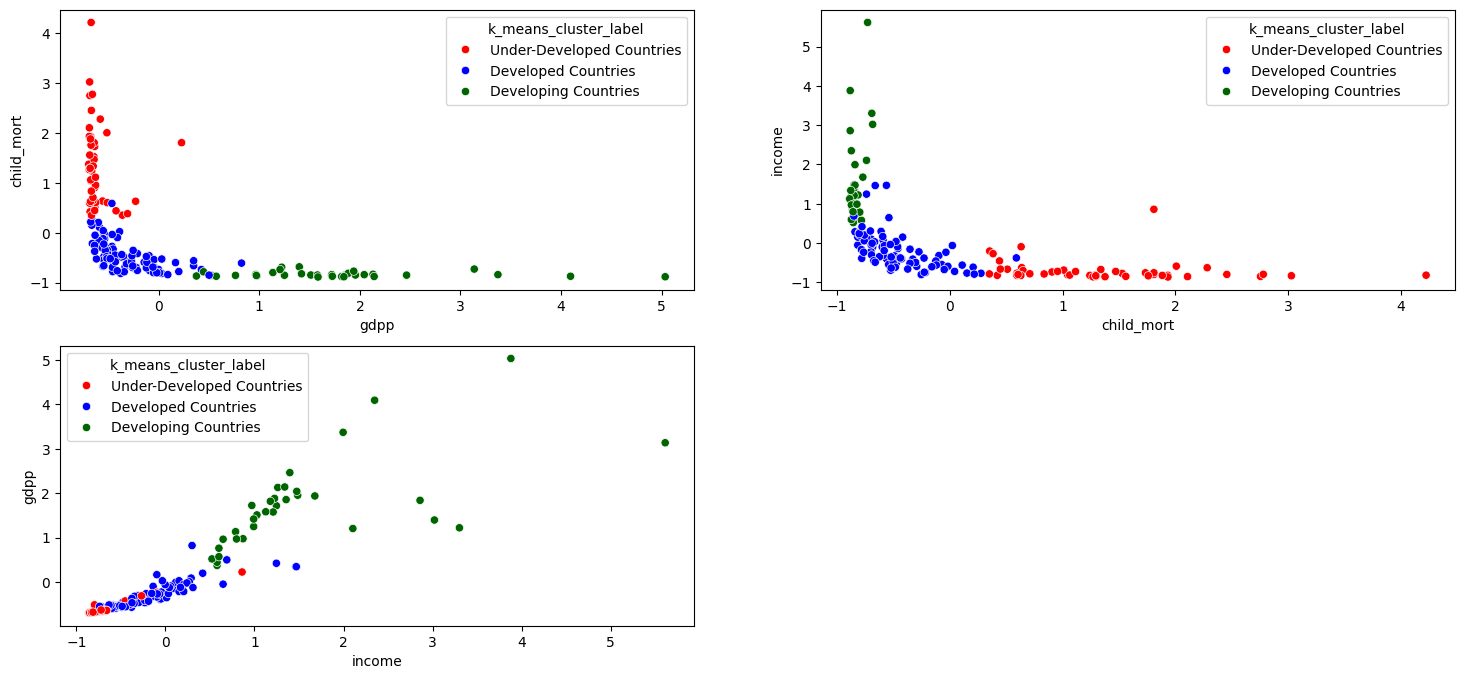

In [ ]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)],
                    hue = 'k_means_cluster_label', data = country_df_kmean, palette=['red','blue','darkgreen'])

**INFERENCES:**

These new labels help us to interpret the plots in a better fashion. We can see that:


*  Developing countries have Medium GDPP, medium Income and mild child mortality rate.

*  Developed countries have High GDPP, High income and very low child mortality rate.

*  Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

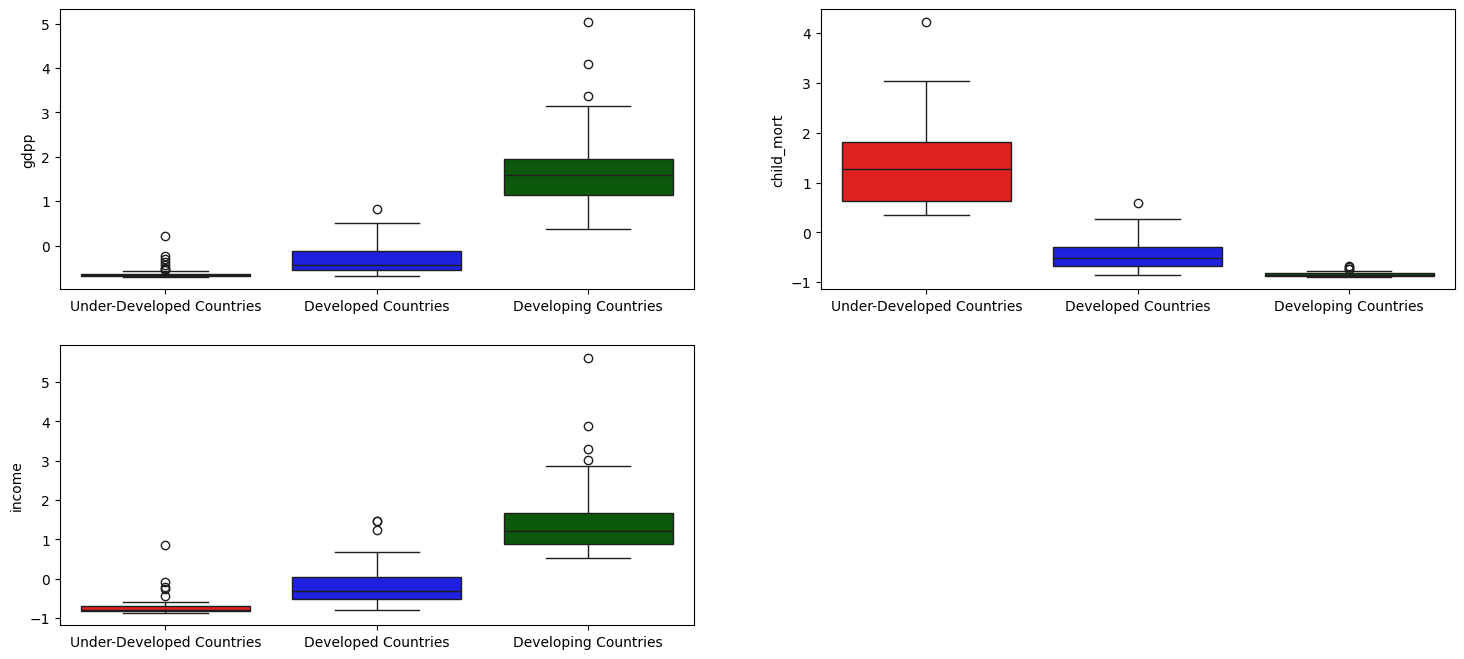

In [ ]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'k_means_cluster_label', y = profiling_cols[i], data = country_df_kmean, palette=['red','blue','darkgreen'])
    plt.xlabel('')

**INFERENCES:**

The similar observation that we got from scatter plots can be seen in boxplots too. The clusters are grouped as


*  Developing countries have Medium GDPP, medium Income and mild child mortality rate.

*  Developed countries have High GDPP, High income and very low child mortality rate.

*  Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

We can see that GDPP and income of the under-developed countries are so low that they are not seen properly in the same scale that of the developed countries.

<Figure size 1800x800 with 0 Axes>

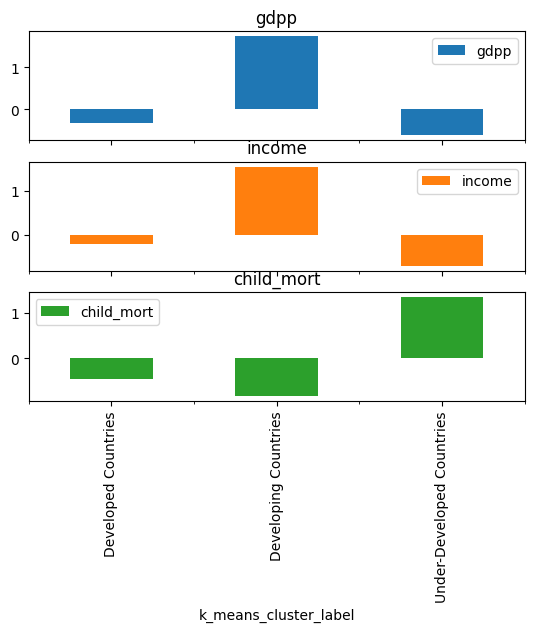

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
plt.figure(figsize=(18,8))
grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

**INFERENCES:**

We can see the mean of the gdpp and income of the under-developed countries are so low when compared to developing or developed countries and we need to look further into this cluster to get the countries which are in most need of aid.

<Axes: xlabel='k_means_cluster_label'>

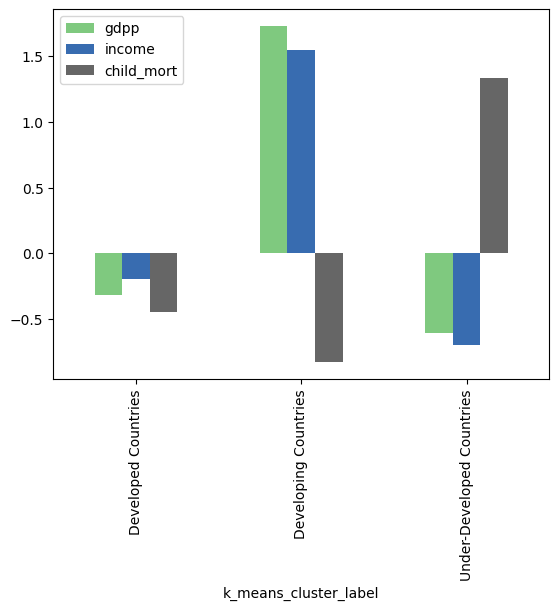

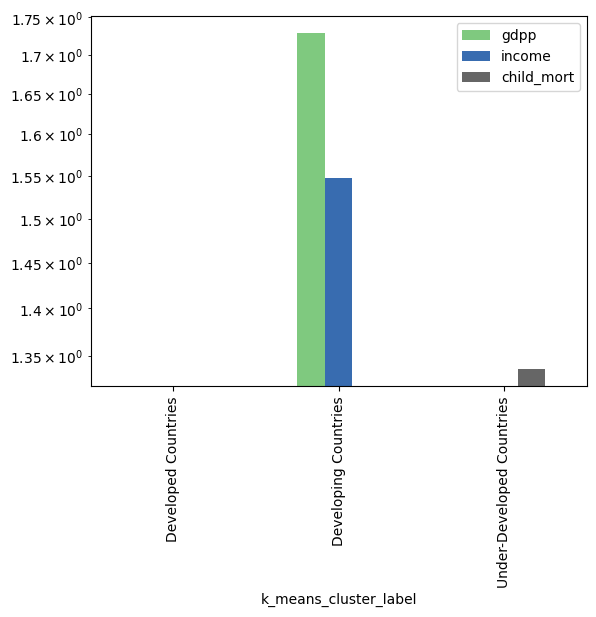

In [ ]:


# Profiling GDP, INCOME AND CHID_MORT together from the above grouped_df
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

**INFERENCES:**

The mean of each cluster show the similar observation and the grouping is done perfectly such that we can focus on cluster Under-Developed Countries as it has Low GDPP, Low income and very high mortality rate.

# **3.7 Identification of Top 10 countries that require aid on priority using K-means algorithm:**

In [ ]:
K_top10 = country_df_kmean[country_df_kmean['k_means_cluster_label'] =='Under-Developed Countries'].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
K_top10

child_mort   exports    health   imports    income  inflation  \
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   
93     0.595154 -0.589429 -1.112133 -0.161172 -0.819692   0.095661   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
50     0.421059 -1.328914 -1.517449 -0.977347 -0.818131   0.362289   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
26    -1.449916   2.194407 -0.696801              0.0  ...              0.0   
88    -1.100286   1.372838 -0.691547              0.0  ...              0.0   
37    -1.472473   2.379922 -0.691164              0.0  ...              0.0   
112   -1.325854   3.009349 -0.690398              0.0  ...              0.0   
132   -1.754433   1.492098 -0.687607              0.0  ...              0.0   
93    -1.100286   1.094565 -0.686841              0.0  ...              0.0   
106   -1.810825   1.730618 -0.686513              0.0  ...              0.0   
31    -2.600313   1.498724 -0.685035              0.0  ...              0.0   
94    -1.968722   1.564979 -0.684324              0.0  ...              0.0   
50    -0.998780   1.101191 -0.683065              0.0  ...              0.0   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
26                  0.0              0.0                0.0              0.0   
88                  0.0              0.0                0.0              0.0   
37                  0.0              0.0                0.0              0.0   
112                 0.0              0.0                0.0              0.0   
132                 0.0              0.0                0.0              0.0   
93                  0.0              0.0                0.0              0.0   
106                 0.0              0.0                0.0              0.0   
31                  0.0              0.0                0.0              0.0   
94                  0.0              0.0                0.0              0.0   
50                  0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
26             0.0             0.0                1               0.227551   
88             0.0             0.0                1               0.206263   
37             0.0             0.0                1               0.828629   
112            0.0             0.0                1               0.452138   
132            0.0             0.0                1               0.486957   
93             0.0             0.0                1               0.581395   
106            0.0             0.0                1               0.681818   
31             0.0             0.0                1               0.445283   
94             0.0             0.0                1               0.653295   
50             0.0             0.0                1               0.205579   

         k_means_cluster_label  
26   Under-Developed Countries  
88   Under-Developed Countries  
37   Under-Developed Countries  
112  Under-Developed Countries  
132  Under-Developed Countries  
93   Under-Developed Countries  
106  Under-Developed Countries  
31   Under-Developed Countries  
94   Under-Developed Countries  
50   Under-Developed Countries  

[10 rows x 178 columns]

In [ ]:
# K_top10.country

These are the countries that require aid, identified by K-means algorithm. Lets use another technique called Hierarchical clustering and see if any other country requires aid much more than these countries and present our final analysis

# **4 Build unsupervised model using Hierarchical Clustering**


*   
We have built an unsupervised model using K-means algorithm. Now lets
create a model to cluster the countries using Hierarchical Clustering.
*   
Hierarchical clustering starts by treating each observation as a separate cluster.

*   
Then, it repeatedly executes the following two steps:
   1.   
identify the two clusters that are closest together
   2.   merge the two most similar clusters.

This iterative process continues until all the clusters are merged together. The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters

**Linkage Criteria:**
*   
There are multiple linkage criteria which determines from where Euclidean distance is computed.
*   It can be computed between
    
 1. The two most similar parts of a cluster in a **single-linkage **

 2. The two least similar bits of a cluster in a **complete-linkage
 3. The center of the clusters in a mean or average-linkage

We will do both single and complete linkages here and try to interpret their dendograms.

**4.1 single linkage:**

In [ ]:
# country_df_scaled
import scipy.cluster.hierarchy as shc
# df_final

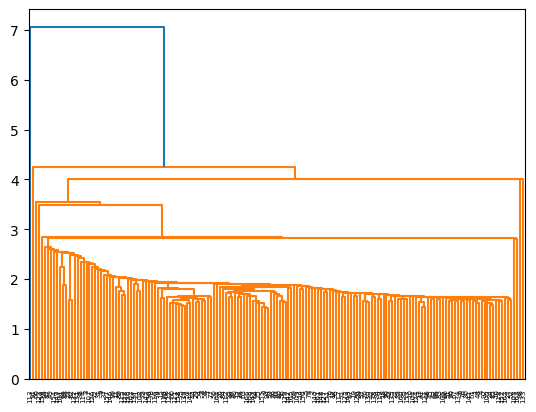

In [ ]:
# single linkage
mergings = shc.linkage(df_final, method="single", metric='euclidean')
shc.dendrogram(mergings)
plt.show()

**INTERPRETATION OF DENDOGRAM:**

Single linkage's dendogram is not readable or interpretable. Hence we cannot use this for our problem.

Lets try with complete linkage and see if it helps

### **4.2 Complete Linkage:**

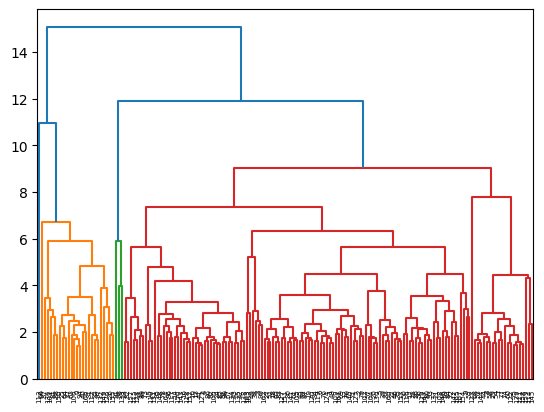

In [ ]:
# complete linkage
mergings = shc.linkage(df_final, method="complete", metric='euclidean')
shc.dendrogram(mergings)
plt.show()

**INTERPRETATION OF DENDOGRAM:**

Complete linkage's dendogram is readable and better to interpret when compared to single linkage's dendogram.

We can see merging of clusters represented in different colors.

If we cut the dendogram tree at SCORE 5 or 6, we have 4 clusters. But we can see the dissimilarity between 4 clusters and 3 clusters is not much as at score 8 itself, we see 3 clusters forming. Only at higher score of 12, 2 sets of clusters available.

This indicates 3 clusters is a good choice as there will be good dissimilarity between clusters and good similarity within clusters.

In [ ]:
# 3 clusters
cluster_labels = shc.cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# assign cluster labels
df_final['cluster_labels'] = cluster_labels
df_final.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  country_Albania  ...  country_Uruguay  \
0   1.902882 -0.679180              0.0  ...              0.0   
1  -0.859973 -0.485623              1.0  ...              0.0   
2  -0.038404 -0.465376              0.0  ...              0.0   
3   2.128151 -0.516268              0.0  ...              0.0   
4  -0.541946 -0.041817              0.0  ...              0.0   

   country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
0                 0.0              0.0                0.0              0.0   
1                 0.0              0.0                0.0              0.0   
2                 0.0              0.0                0.0              0.0   
3                 0.0              0.0                0.0              0.0   
4                 0.0              0.0                0.0              0.0   

   country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
0            0.0             0.0                1               0.222717   
1            0.0             0.0                0               0.576132   
2            0.0             0.0                0               1.222930   
3            0.0             0.0                1               1.452214   
4            0.0             0.0                0               0.772496   

   cluster_labels  
0               0  
1               1  
2               1  
3               1  
4               1  

[5 rows x 178 columns]

### **4.3 Initial Cluster Profiling Using Hierarchical Clustering Model**

In [ ]:
df_final.cluster_labels.value_counts()

cluster_labels
1    138
0     26
2      3
Name: count, dtype: int64

We can see here that though the number of clusters are same as K-means algorithm i.e.3, number of countries in each cluster vary. Lets profile the clusters and label these

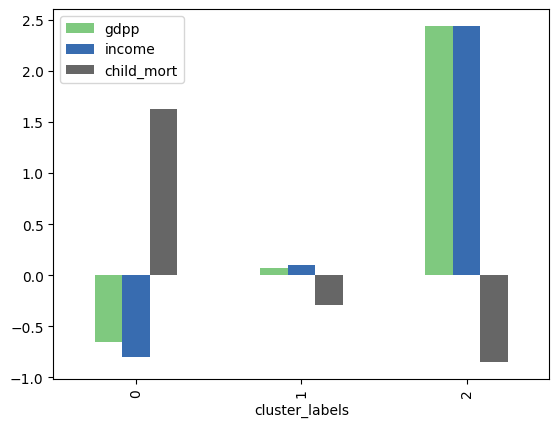

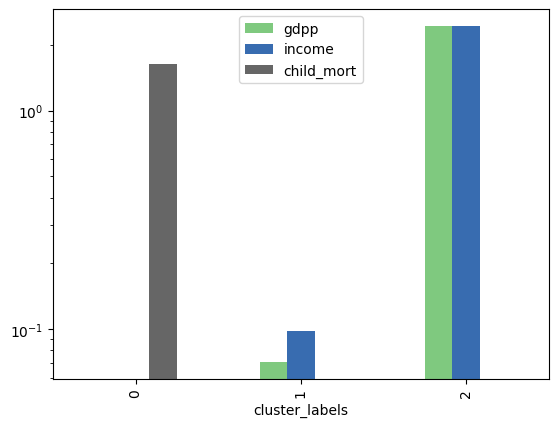

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = df_final[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

<Axes: xlabel='cluster_labels'>

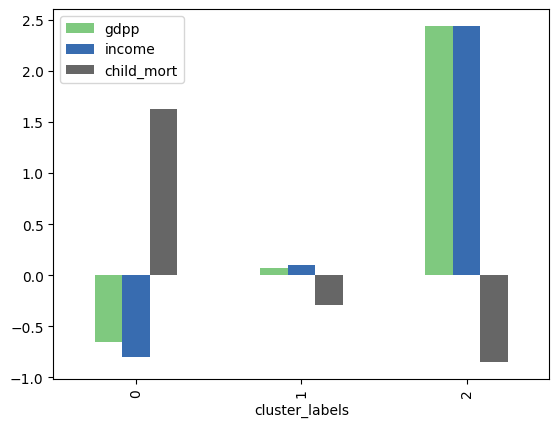

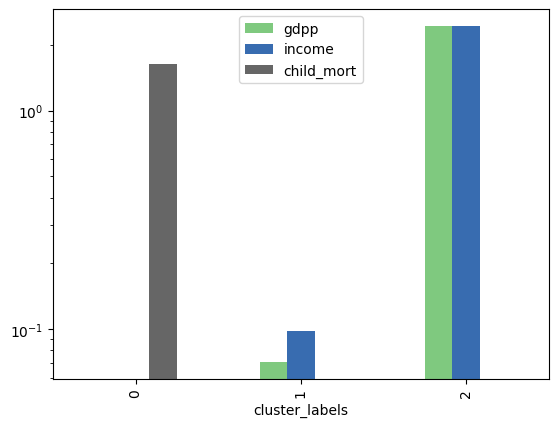

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

From the above plots, its evident that the cluster labels



*   0 : Under-developed countries having low GDPP, low income and high child mortality rate.
*   1 : Developing countries having medium GDPP, medium income and mild child mortality rate.
*   2 : Developed countries having high GDPP, high income and very low child mortality rate.


**4.4 Countries Segmentation**

Similar to our approach in K-mean algorithm, We can rename the labels for better business understanding as cluster label 0, 1 and 2 does not make sense to interpret. Then we will perform the cluster profiling with new labels.


Lets rename the cluster labels as

*   0 : Under-developed Countries
*   1 : Developing Countries
*   2 : Developed Countries
This would help the NGO to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries and focus on Cluster 2: Under-developed Countries


In [ ]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

df_final.loc[df_final['cluster_labels'] == 0,'cluster_labels'] ='Under-Developed Countries'
df_final[df_final['cluster_labels'] == 'Under-Developed Countries']

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
25     1.933196 -0.801651 -0.027638 -0.716337 -0.817611  -0.092213   
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
32     2.778798 -0.157666 -0.834619 -0.140457 -0.791596  -0.132065   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
40     1.808842  0.347277 -0.553454 -0.148743 -0.752055  -0.226950   
63     1.759101 -0.395501 -0.688559 -0.152886 -0.830097   0.789274   
64     1.883454 -0.958988  0.615026 -0.484328 -0.819692  -0.456574   
66     4.221297 -0.944352  0.034438  0.737863 -0.813969  -0.221257   
81     0.607589 -1.017533  1.637446  1.367601 -0.802002  -0.594158   
87     1.527804 -0.062532  1.564416  2.241778 -0.768184  -0.344609   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
97     2.455480 -0.669927 -0.670302 -0.488471 -0.794718  -0.323734   
101    0.043025 -0.644314  2.696381  1.413174 -0.718236  -0.377819   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
113    2.281385 -0.578452 -0.637438 -1.221785 -0.624065   9.129718   
126    0.629973 -1.065100  1.345326 -0.699765 -0.821773  -0.490732   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   
136   -0.252936  0.299710  0.633284  1.421460 -0.799401  -0.092213   
149    0.605102 -1.423682  0.841419 -0.790911 -0.795759   1.776084   
150    1.294019 -0.033260  0.304649  0.431279 -0.829057  -0.626419   
155    1.062722 -0.878490  0.801253 -0.757767 -0.811887   0.267404   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
0     -1.619092   1.902882 -0.679180              0.0  ...              0.0   
25    -1.427359   1.936010 -0.677976              0.0  ...              0.0   
26    -1.449916   2.194407 -0.696801              0.0  ...              0.0   
31    -2.600313   1.498724 -0.685035              0.0  ...              0.0   
32    -1.585257   2.413050 -0.660355              0.0  ...              0.0   
37    -1.472473   2.379922 -0.691164              0.0  ...              0.0   
40    -1.607814   1.538477 -0.642679              0.0  ...              0.0   
63    -1.416081   1.584856 -0.673981              0.0  ...              0.0   
64    -1.686762   1.392715 -0.679508              0.0  ...              0.0   
66    -4.337186   0.253120 -0.673215              0.0  ...              0.0   
81    -1.111564   0.591023 -0.627904              0.0  ...              0.0   
87    -2.713097   0.233243 -0.645415              0.0  ...              0.0   
88    -1.100286   1.372838 -0.691547              0.0  ...              0.0   
94    -1.968722   1.564979 -0.684324              0.0  ...              0.0   
97    -1.246905   2.386548 -0.670697              0.0  ...              0.0   
101   -0.581479   0.339252 -0.552933              0.0  ...              0.0   
106   -1.810825   1.730618 -0.686513              0.0  ...              0.0   
112   -1.325854   3.009349 -0.690398              0.0  ...              0.0   
113   -1.134121   1.916133 -0.581936              0.0  ...              0.0   
126   -0.671706   1.034935 -0.678632              0.0  ...              0.0   
132   -1.754433   1.492098 -0.687607              0.0  ...              0.0   
136   -0.998780   0.856045 -0.638849              0.0  ...              0.0   
149    0.061390   2.174530 -0.512438              0.0  ...              0.0   
150   -1.337132   1.273455 -0.682737              0.0  ...              0.0   
155   -1.551422   2.121525 -0.676881              0.0  ...              0.0   
166   -2.092785   1.624609 -0.629546              0.0  ...  

In [ ]:
df_final[df_final['cluster_labels'] == 'Under-Developed Countries'].describe()

child_mort    exports     health    imports     income  inflation  \
count   26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean     1.629678  -0.612762   0.421356   0.044704  -0.803637   0.400827   
std      0.962806   0.473361   1.056785   0.920977   0.052349   1.880032   
min     -0.252936  -1.423682  -1.035452  -1.221785  -0.860326  -0.626419   
25%      1.153500  -0.955329  -0.578101  -0.625190  -0.836341  -0.369516   
50%      1.543970  -0.680904   0.291868  -0.150815  -0.815790  -0.112139   
75%      2.063767  -0.206148   1.219349   0.351526  -0.794978   0.423965   
max      4.221297   0.347277   2.696381   2.241778  -0.624065   9.129718   

       life_expec  total_fer       gdpp  country_Albania  ...  \
count   26.000000  26.000000  26.000000             26.0  ...   
mean    -1.559230   1.569821  -0.657625              0.0  ...   
std      0.806069   0.707643   0.045491              0.0  ...   
min     -4.337186   0.233243  -0.696801              0.0  ...   
25%     -1.737515   1.298301  -0.684857              0.0  ...   
50%     -1.461194   1.574917  -0.677428              0.0  ...   
75%     -1.162317   2.075147  -0.643363              0.0  ...   
max      0.061390   3.009349  -0.512438              0.0  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count                   26.0             26.0                26.0   
mean                     0.0              0.0                 0.0   
std                      0.0              0.0                 0.0   
min                      0.0              0.0                 0.0   
25%                      0.0              0.0                 0.0   
50%                      0.0              0.0                 0.0   
75%                      0.0              0.0                 0.0   
max                      0.0              0.0                 0.0   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count             26.0               26.0             26.0           26.0   
mean               0.0                0.0              0.0            0.0   
std                0.0                0.0              0.0            0.0   
min                0.0                0.0              0.0            0.0   
25%                0.0                0.0              0.0            0.0   
50%                0.0                0.0              0.0            0.0   
75%                0.0                0.0              0.0            0.0   
max                0.0                0.0              0.0            0.0   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count       26.000000        26.000000              26.000000  
mean         0.038462         0.923077               0.567787  
std          0.196116         0.271746               0.336318  
min          0.000000         0.000000               0.079137  
25%          0.000000         1.000000               0.315117  
50%          0.000000         1.000000               0.542429  
75%          0.000000         1.000000               0.696496  
max          1.000000         1.000000               1.454023  

[8 rows x 177 columns]

In [ ]:
# Medium income, Medium GDP and Mild Child_mort
# Filter the data for that clsuter

df_final.loc[df_final['cluster_labels'] == 1,'cluster_labels'] ='Developing Countries'
df_final[df_final['cluster_labels'] == 'Developing Countries']

child_mort   exports    health   imports    income  inflation  \
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
5     -0.591177 -0.812628  0.468966 -1.279787  0.080920   1.244725   
..          ...       ...       ...       ...       ...        ...   
161   -0.048997 -0.344275 -0.367227 -0.761910 -0.671411   0.827229   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
1      0.647866  -0.859973 -0.485623              1.0  ...              0.0   
2      0.670423  -0.038404 -0.465376              0.0  ...              0.0   
3     -1.179234   2.128151 -0.516268              0.0  ...              0.0   
4      0.704258  -0.541946 -0.041817              0.0  ...              0.0   
5      0.591474  -0.382933 -0.145791              0.0  ...              0.0   
..          ...        ...       ...              ...  ...              ...   
161   -0.198014  -0.402810 -0.633923              0.0  ...              0.0   
162   -0.852161   0.365754 -0.546913              0.0  ...              0.0   
163    0.546361  -0.316678  0.029323              0.0  ...              0.0   
164    0.286958  -0.661206 -0.637754              0.0  ...              0.0   
165   -0.344633   1.140944 -0.637754              0.0  ...              0.0   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
1                   0.0              0.0                0.0              0.0   
2                   0.0              0.0                0.0              0.0   
3                   0.0              0.0                0.0              0.0   
4                   0.0              0.0                0.0              0.0   
5                   0.0              0.0                0.0              0.0   
..                  ...              ...                ...              ...   
161                 1.0              0.0                0.0              0.0   
162                 0.0              1.0                0.0              0.0   
163                 0.0              0.0                1.0              0.0   
164                 0.0              0.0                0.0              1.0   
165                 0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
1              0.0             0.0                0               0.576132   
2              0.0             0.0                0               1.222930   
3              0.0             0.0                1               1.452214   
4              0.0             0.0                0               0.772496   
5              0.0             0.0                0               1.181250   
..             ...             ...              ...                    ...   
161            0.0             0.0                0               1.112281   
162            0.0             0.0                0               0.884250   
163            0.0             0.0                0               1.619318   
164            0.0             0.0                0               0.897756   
165            1.0             0.0                1               0.872093   

           cluster_labels  
1    Developing Countries  
2    Developing Countries  
3    Developing Countries  
4    Developing Countries  
5    Developing Countries  
..                    ...  
161  Developing Countries  
162  Developing Countries  
163  Developing Countries  
164  Developing Countries  
165  Deve

In [ ]:
df_final[df_final['cluster_labels'] == 'Developing Countries'].describe()

child_mort     exports      health     imports      income   inflation  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean    -0.288584    0.008151   -0.079209   -0.107293    0.098376   -0.064557   
std      0.667883    0.750004    0.981362    0.769884    0.956139    0.730146   
min     -0.887138   -1.500192   -1.827827   -1.939940   -0.819692   -1.137852   
25%     -0.775842   -0.555583   -0.748809   -0.728766   -0.557729   -0.585144   
50%     -0.532731   -0.126564   -0.286894   -0.161172   -0.207837   -0.292421   
75%     -0.054593    0.441497    0.523739    0.458209    0.566085    0.217589   
max      2.007808    2.264597    4.047436    2.531789    5.611542    3.616865   

       life_expec   total_fer        gdpp  country_Albania  ...  \
count  138.000000  138.000000  138.000000       138.000000  ...   
mean     0.267098   -0.273179    0.070840         0.007246  ...   
std      0.730702    0.748825    0.959238         0.085126  ...   
min     -1.833382   -1.138246   -0.686841         0.000000  ...   
25%     -0.192374   -0.806968   -0.547324         0.000000  ...   
50%      0.405381   -0.515444   -0.357023         0.000000  ...   
75%      0.808584   -0.040061    0.316621         0.000000  ...   
max      1.380962    2.128151    4.095266         1.000000  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count             138.000000       138.000000          138.000000   
mean                0.007246         0.007246            0.007246   
std                 0.085126         0.085126            0.085126   
min                 0.000000         0.000000            0.000000   
25%                 0.000000         0.000000            0.000000   
50%                 0.000000         0.000000            0.000000   
75%                 0.000000         0.000000            0.000000   
max                 1.000000         1.000000            1.000000   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count       138.000000         138.000000       138.000000     138.000000   
mean          0.007246           0.007246         0.007246       0.007246   
std           0.085126           0.085126         0.085126       0.085126   
min           0.000000           0.000000         0.000000       0.000000   
25%           0.000000           0.000000         0.000000       0.000000   
50%           0.000000           0.000000         0.000000       0.000000   
75%           0.000000           0.000000         0.000000       0.000000   
max           1.000000           1.000000         1.000000       1.000000   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count           138.0       138.000000             138.000000  
mean              0.0         0.188406               0.985617  
std               0.0         0.392460               0.435551  
min               0.0         0.000000               0.205579  
25%               0.0         0.000000               0.718507  
50%               0.0         0.000000               0.924096  
75%               0.0         0.000000               1.144052  
max               0.0         1.000000               3.052910  

[8 rows x 177 columns]

In [ ]:
# High income, High GDP and Low Child_mort
# Filter the data for that clsuter

df_final.loc[df_final['cluster_labels'] == 2,'cluster_labels'] ='Developed Countries'
df_final[df_final['cluster_labels'] == 'Developed Countries']

child_mort   exports    health   imports    income  inflation  \
91    -0.882164  4.899083  0.348467  3.940415  3.878996  -0.394898   
98    -0.782681  4.094101  0.669799  4.437577  0.580393  -0.374972   
133   -0.882164  5.813835 -1.042755  5.266181  2.859238  -0.742749   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
91     1.211786  -0.873224  5.036507              0.0  ...              0.0   
98     1.099002  -1.052114  0.445220              0.0  ...              0.0   
133    1.369684  -1.191250  1.840665              0.0  ...              0.0   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
91                  0.0              0.0                0.0              0.0   
98                  0.0              0.0                0.0              0.0   
133                 0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
91             0.0             0.0                0               1.232394   
98             0.0             0.0                0               0.993506   
133            0.0             0.0                0               1.149425   

          cluster_labels  
91   Developed Countries  
98   Developed Countries  
133  Developed Countries  

[3 rows x 178 columns]

In [ ]:
df_final[df_final['cluster_labels'] == 'Developed Countries'].describe()

child_mort   exports    health   imports    income  inflation  \
count    3.000000  3.000000  3.000000  3.000000  3.000000   3.000000   
mean    -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   
std      0.057436  0.860450  0.910274  0.669752  1.688876   0.206824   
min     -0.882164  4.094101 -1.042755  3.940415  0.580393  -0.742749   
25%     -0.882164  4.496592 -0.347144  4.188996  1.719816  -0.568823   
50%     -0.882164  4.899083  0.348467  4.437577  2.859238  -0.394898   
75%     -0.832423  5.356459  0.509133  4.851879  3.369117  -0.384935   
max     -0.782681  5.813835  0.669799  5.266181  3.878996  -0.374972   

       life_expec  total_fer      gdpp  country_Albania  ...  \
count    3.000000   3.000000  3.000000              3.0  ...   
mean     1.226824  -1.038863  2.440797              0.0  ...   
std      0.135966   0.159427  2.353741              0.0  ...   
min      1.099002  -1.191250  0.445220              0.0  ...   
25%      1.155394  -1.121682  1.142943              0.0  ...   
50%      1.211786  -1.052114  1.840665              0.0  ...   
75%      1.290735  -0.962669  3.438586              0.0  ...   
max      1.369684  -0.873224  5.036507              0.0  ...   

       country_United States  country_Uruguay  country_Uzbekistan  \
count                    3.0              3.0                 3.0   
mean                     0.0              0.0                 0.0   
std                      0.0              0.0                 0.0   
min                      0.0              0.0                 0.0   
25%                      0.0              0.0                 0.0   
50%                      0.0              0.0                 0.0   
75%                      0.0              0.0                 0.0   
max                      0.0              0.0                 0.0   

       country_Vanuatu  country_Venezuela  country_Vietnam  country_Yemen  \
count              3.0                3.0              3.0            3.0   
mean               0.0                0.0              0.0            0.0   
std                0.0                0.0              0.0            0.0   
min                0.0                0.0              0.0            0.0   
25%                0.0                0.0              0.0            0.0   
50%                0.0                0.0              0.0            0.0   
75%                0.0                0.0              0.0            0.0   
max                0.0                0.0              0.0            0.0   

       country_Zambia  High_Child_Mort  Exports_Imports_Ratio  
count             3.0              3.0               3.000000  
mean              0.0              0.0               1.125109  
std               0.0              0.0               0.121286  
min               0.0              0.0               0.993506  
25%               0.0              0.0               1.071466  
50%               0.0              0.0               1.149425  
75%               0.0              0.0               1.190910  
max               0.0              0.0               1.232394  

[8 rows x 177 columns]

Clustering is done well in this case as well as can be seen from summary statistics of each cluster.

### **4.5 Final Cluster Profiling with new labels**

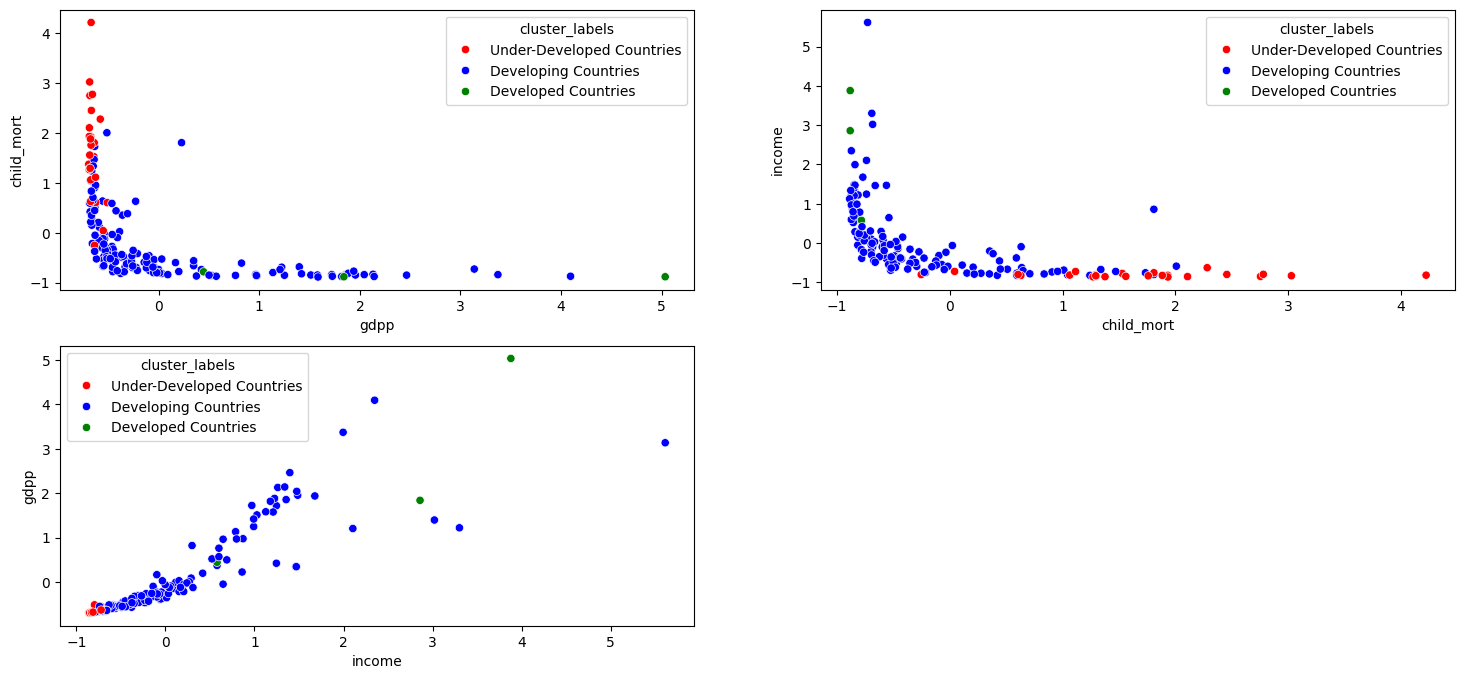

In [ ]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)],
                    hue = 'cluster_labels', data =df_final, palette=['red','blue','green'])

**INFERENCES:**
These new labels help us to interpret the plots in a better fashion. We can see that


*  Developing countries have Medium GDPP, medium Income and mild child mortality rate.

*   Developed countries have High GDPP, High income and very low child mortality rate.

*   Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

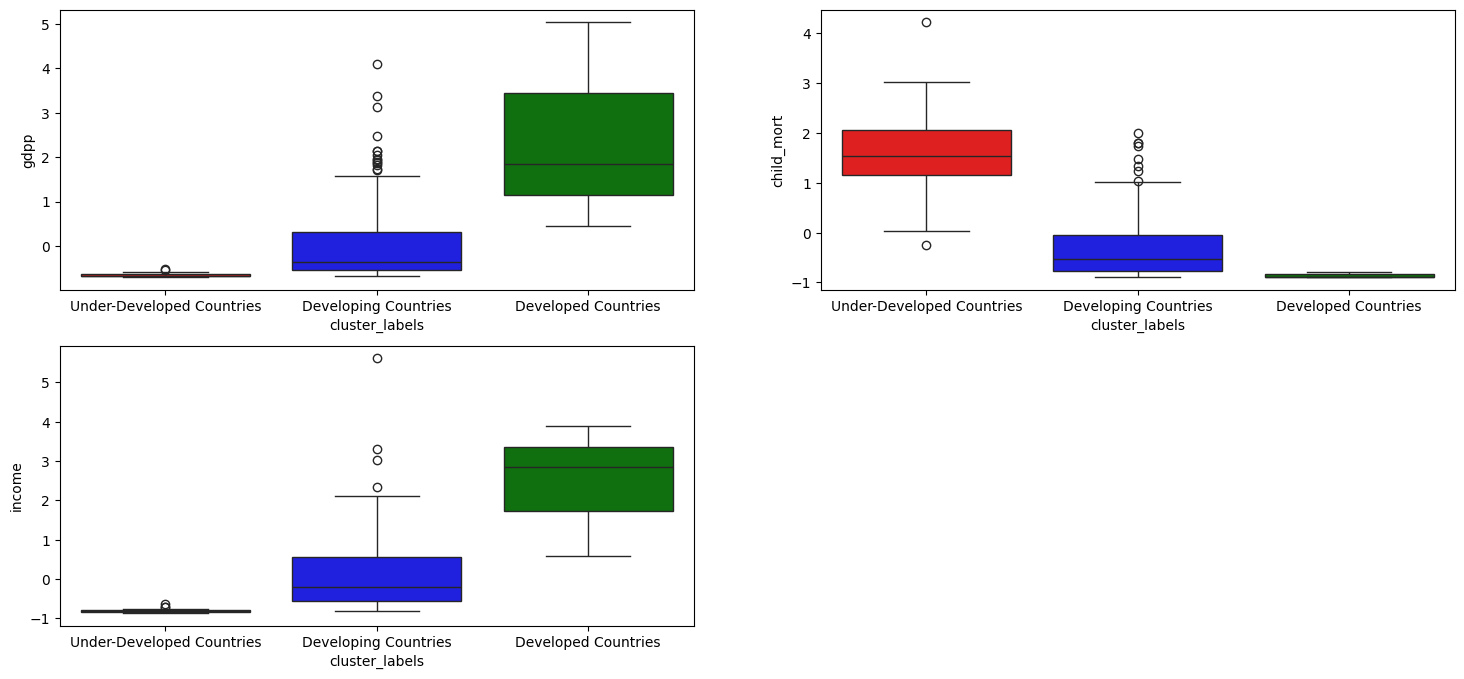

In [ ]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'cluster_labels', y = profiling_cols[i], data = df_final, palette=['red','blue','green'])

**INFERENCES:**

The similar observation that we got from scatter plots can be seen in boxplots too. The clusters are grouped as



*  Developing countries have Medium GDPP, medium Income and mild child mortality rate.

* Developed countries have High GDPP, High income and very low child mortality rate.

* Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

We can see that GDPP and income of the under-developed countries are so low that they are not seen properly in the same scale that of the developed countries.


These plots are similar to K-means algorithm plots and hence our analysis is good.

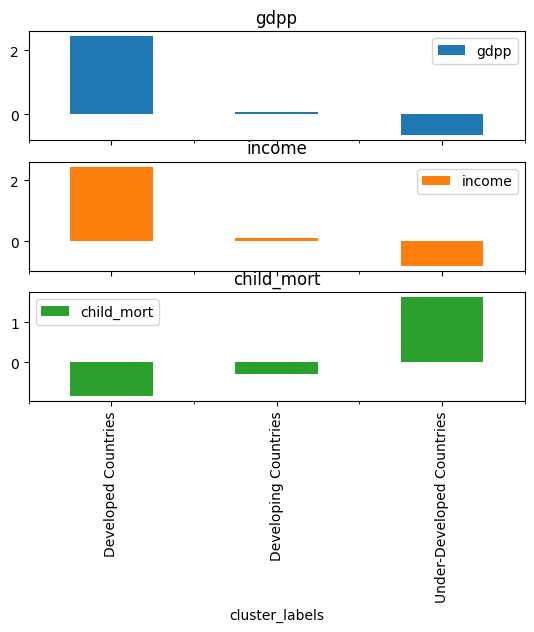

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
grouped_df = df_final[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', subplots=True)
plt.show()

<Axes: xlabel='cluster_labels'>

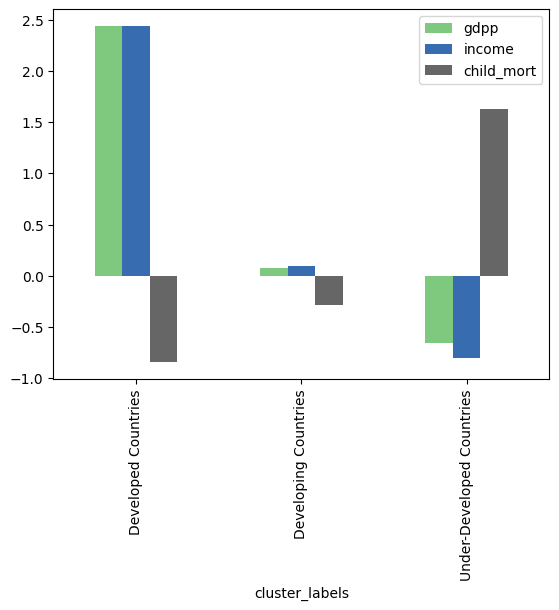

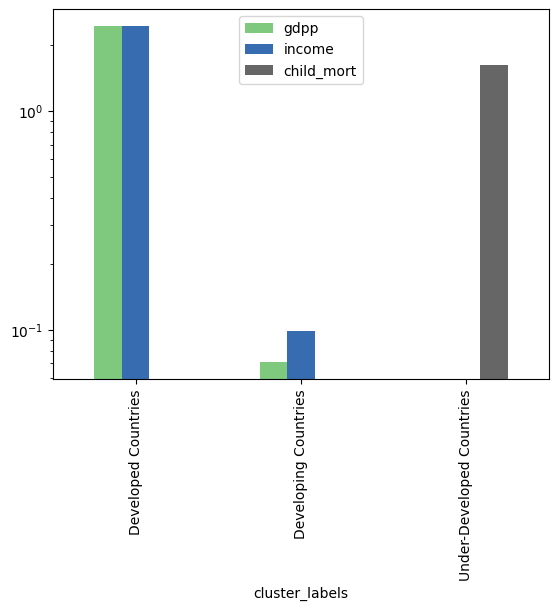

In [ ]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

**INFERENCES:**

The average of each cluster show the similar observation and the grouping is done perfectly such that we can focus on cluster Under-Developed Countries as it has Low GDPP, Low income and very high mortality rate.

# **4.6 Identification of Top 10 countries that require aid on priority using Hierarchical clustering:**

In [ ]:
H_top10 = df_final[df_final['cluster_labels'] =='Under-Developed Countries'].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
H_top10


child_mort   exports    health   imports    income  inflation  \
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
150    1.294019 -0.033260  0.304649  0.431279 -0.829057  -0.626419   
64     1.883454 -0.958988  0.615026 -0.484328 -0.819692  -0.456574   

     life_expec  total_fer      gdpp  country_Albania  ...  country_Uruguay  \
26    -1.449916   2.194407 -0.696801              0.0  ...              0.0   
88    -1.100286   1.372838 -0.691547              0.0  ...              0.0   
37    -1.472473   2.379922 -0.691164              0.0  ...              0.0   
112   -1.325854   3.009349 -0.690398              0.0  ...              0.0   
132   -1.754433   1.492098 -0.687607              0.0  ...              0.0   
106   -1.810825   1.730618 -0.686513              0.0  ...              0.0   
31    -2.600313   1.498724 -0.685035              0.0  ...              0.0   
94    -1.968722   1.564979 -0.684324              0.0  ...              0.0   
150   -1.337132   1.273455 -0.682737              0.0  ...              0.0   
64    -1.686762   1.392715 -0.679508              0.0  ...              0.0   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
26                  0.0              0.0                0.0              0.0   
88                  0.0              0.0                0.0              0.0   
37                  0.0              0.0                0.0              0.0   
112                 0.0              0.0                0.0              0.0   
132                 0.0              0.0                0.0              0.0   
106                 0.0              0.0                0.0              0.0   
31                  0.0              0.0                0.0              0.0   
94                  0.0              0.0                0.0              0.0   
150                 0.0              0.0                0.0              0.0   
64                  0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
26             0.0             0.0                1               0.227551   
88             0.0             0.0                1               0.206263   
37             0.0             0.0                1               0.828629   
112            0.0             0.0                1               0.452138   
132            0.0             0.0                1               0.486957   
106            0.0             0.0                1               0.681818   
31             0.0             0.0                1               0.445283   
94             0.0             0.0                1               0.653295   
150            0.0             0.0                1               0.701571   
64             0.0             0.0                1               0.423295   

                cluster_labels  
26   Under-Developed Countries  
88   Under-Developed Countries  
37   Under-Developed Countries  
112  Under-Developed Countries  
132  Under-Developed Countries  
106  Under-Developed Countries  
31   Under-Developed Countries  
94   Under-Developed Countries  
150  Under-Developed Countries  
64   Under-Developed Countries  

[10 rows x 178 columns]

In [ ]:
# H_top10.country

In [ ]:
# list(K_top10.country)==list(H_top10.country)

This indicates both K-means and Hierarchical Clustering returned same list of 10 countries which are in need of aid.


We can chose final suggestions based on K-means clustering as the similarity within a cluster and dissimilarity across clusters is good in this methodology as can be seen from the summary statistics after segmentation. Also in K-means clustering, we have got around 48 countries in under developed countries clusters and hence it looks like better clustering mechanism.


Lets break this into two lists as top5 in priority 1 list and next set of 5 countries in priority 2 list.

In [ ]:
Priority_1_countries = K_top10.head(5)
Priority_1_countries['Aid Priority'] = "Aid Requirement Priority 1"
Priority_1_countries

child_mort   exports    health   imports    income  inflation  \
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   

     life_expec  total_fer      gdpp  country_Albania  ...  \
26    -1.449916   2.194407 -0.696801              0.0  ...   
88    -1.100286   1.372838 -0.691547              0.0  ...   
37    -1.472473   2.379922 -0.691164              0.0  ...   
112   -1.325854   3.009349 -0.690398              0.0  ...   
132   -1.754433   1.492098 -0.687607              0.0  ...   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
26                  0.0              0.0                0.0              0.0   
88                  0.0              0.0                0.0              0.0   
37                  0.0              0.0                0.0              0.0   
112                 0.0              0.0                0.0              0.0   
132                 0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
26             0.0             0.0                1               0.227551   
88             0.0             0.0                1               0.206263   
37             0.0             0.0                1               0.828629   
112            0.0             0.0                1               0.452138   
132            0.0             0.0                1               0.486957   

         k_means_cluster_label                Aid Priority  
26   Under-Developed Countries  Aid Requirement Priority 1  
88   Under-Developed Countries  Aid Requirement Priority 1  
37   Under-Developed Countries  Aid Requirement Priority 1  
112  Under-Developed Countries  Aid Requirement Priority 1  
132  Under-Developed Countries  Aid Requirement Priority 1  

[5 rows x 179 columns]

In [ ]:
Priority_2_countries = K_top10.tail(5)
Priority_2_countries['Aid Priority'] = "Aid Requirement Priority 2"
Priority_2_countries

child_mort   exports    health   imports    income  inflation  \
93     0.595154 -0.589429 -1.112133 -0.161172 -0.819692   0.095661   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
50     0.421059 -1.328914 -1.517449 -0.977347 -0.818131   0.362289   

     life_expec  total_fer      gdpp  country_Albania  ...  \
93    -1.100286   1.094565 -0.686841              0.0  ...   
106   -1.810825   1.730618 -0.686513              0.0  ...   
31    -2.600313   1.498724 -0.685035              0.0  ...   
94    -1.968722   1.564979 -0.684324              0.0  ...   
50    -0.998780   1.101191 -0.683065              0.0  ...   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
93                  0.0              0.0                0.0              0.0   
106                 0.0              0.0                0.0              0.0   
31                  0.0              0.0                0.0              0.0   
94                  0.0              0.0                0.0              0.0   
50                  0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
93             0.0             0.0                1               0.581395   
106            0.0             0.0                1               0.681818   
31             0.0             0.0                1               0.445283   
94             0.0             0.0                1               0.653295   
50             0.0             0.0                1               0.205579   

         k_means_cluster_label                Aid Priority  
93   Under-Developed Countries  Aid Requirement Priority 2  
106  Under-Developed Countries  Aid Requirement Priority 2  
31   Under-Developed Countries  Aid Requirement Priority 2  
94   Under-Developed Countries  Aid Requirement Priority 2  
50   Under-Developed Countries  Aid Requirement Priority 2  

[5 rows x 179 columns]

# **5. Presenting countries that are in need of help to HELP International**

In [ ]:
def results_plots(df_name):
    plt.figure(figsize=[18,6])
    for i,column_name in enumerate(profiling_cols):
        plt.subplot(2,2,i+1)
        ax = sns.barplot(x='country', y=column_name, data= df_name)
        for each_bar in ax.patches:
            ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
        plt.ylabel(column_name)
        plt.xlabel('Countries which have poor %s' %column_name)

First set of countries that require aid immediately:

In [ ]:
Priority_1_countries

child_mort   exports    health   imports    income  inflation  \
26     1.376093 -1.177797  1.746991 -0.318607 -0.852261   0.428709   
88     1.269149 -0.805310  1.820021  1.893764 -0.855591  -0.219360   
37     1.933196 -0.000328  0.399588  0.112267 -0.860326   1.235237   
112    2.107290 -0.691881 -0.604575  0.091552 -0.849660  -0.496426   
132    3.027505 -0.889467  2.294716 -0.513329 -0.828536   0.893648   

     life_expec  total_fer      gdpp  country_Albania  ...  \
26    -1.449916   2.194407 -0.696801              0.0  ...   
88    -1.100286   1.372838 -0.691547              0.0  ...   
37    -1.472473   2.379922 -0.691164              0.0  ...   
112   -1.325854   3.009349 -0.690398              0.0  ...   
132   -1.754433   1.492098 -0.687607              0.0  ...   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
26                  0.0              0.0                0.0              0.0   
88                  0.0              0.0                0.0              0.0   
37                  0.0              0.0                0.0              0.0   
112                 0.0              0.0                0.0              0.0   
132                 0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
26             0.0             0.0                1               0.227551   
88             0.0             0.0                1               0.206263   
37             0.0             0.0                1               0.828629   
112            0.0             0.0                1               0.452138   
132            0.0             0.0                1               0.486957   

         k_means_cluster_label                Aid Priority  
26   Under-Developed Countries  Aid Requirement Priority 1  
88   Under-Developed Countries  Aid Requirement Priority 1  
37   Under-Developed Countries  Aid Requirement Priority 1  
112  Under-Developed Countries  Aid Requirement Priority 1  
132  Under-Developed Countries  Aid Requirement Priority 1  

[5 rows x 179 columns]

In [ ]:
# Priority_1_countries.set_index('country').plot(kind='bar')
# plt.xlabel('')
# plt.show()

In [ ]:
# results_plots(Priority_1_countries)

Once the above countries are helped with, the following set could be provided aid as next set of countries:

In [ ]:
Priority_2_countries

child_mort   exports    health   imports    income  inflation  \
93     0.595154 -0.589429 -1.112133 -0.161172 -0.819692   0.095661   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
31     2.753928 -1.072418 -1.035452 -0.844770 -0.845810  -0.547664   
94     1.298994 -0.669927 -0.082410 -0.496757 -0.838422   0.409732   
50     0.421059 -1.328914 -1.517449 -0.977347 -0.818131   0.362289   

     life_expec  total_fer      gdpp  country_Albania  ...  \
93    -1.100286   1.094565 -0.686841              0.0  ...   
106   -1.810825   1.730618 -0.686513              0.0  ...   
31    -2.600313   1.498724 -0.685035              0.0  ...   
94    -1.968722   1.564979 -0.684324              0.0  ...   
50    -0.998780   1.101191 -0.683065              0.0  ...   

     country_Uzbekistan  country_Vanuatu  country_Venezuela  country_Vietnam  \
93                  0.0              0.0                0.0              0.0   
106                 0.0              0.0                0.0              0.0   
31                  0.0              0.0                0.0              0.0   
94                  0.0              0.0                0.0              0.0   
50                  0.0              0.0                0.0              0.0   

     country_Yemen  country_Zambia  High_Child_Mort  Exports_Imports_Ratio  \
93             0.0             0.0                1               0.581395   
106            0.0             0.0                1               0.681818   
31             0.0             0.0                1               0.445283   
94             0.0             0.0                1               0.653295   
50             0.0             0.0                1               0.205579   

         k_means_cluster_label                Aid Priority  
93   Under-Developed Countries  Aid Requirement Priority 2  
106  Under-Developed Countries  Aid Requirement Priority 2  
31   Under-Developed Countries  Aid Requirement Priority 2  
94   Under-Developed Countries  Aid Requirement Priority 2  
50   Under-Developed Countries  Aid Requirement Priority 2  

[5 rows x 179 columns]

In [ ]:
# Priority_2_countries.set_index('country').plot(kind='bar')
# plt.xlabel('')
# plt.show()

In [ ]:
# results_plots(Priority_2_countries)

In [ ]:
with open ('kmeans.pkl','wb') as f :
    pickle.dump(kmeans,f)

In [ ]:
!zip -r ./kmeans.pkl.zip ./kmeans-model.pkl

	zip warning: name not matched: ./kmeans-model.pkl

zip error: Nothing to do! (try: zip -r ./kmeans.pkl.zip . -i ./kmeans-model.pkl)


In [ ]:
with open ('hierarchical.pkl','wb') as f:
    pickle.dump(hierarchical,f)

In [ ]:
!zip -r ./hierarchical.pkl.zip ./hierarchical.pkl

  adding: hierarchical.pkl (deflated 68%)


# **Suggestions to HELP International - Countries that are in need of aid:**


The following 5 are the countries which have to be provided aid first:



1.   Burundi

2.   Liberia

3.   Congo, Dem. Rep.

4.   Niger

5.   Sierra Leone

Once the above countries are provided with Aid, the following are the next set of countries which would require aid in order to reduce the child mortality rate and improve their GDPP and income per person:

1. Madagascar

2. Mozambique

3. Central African Republic

4. Malawi

5. Eritrea